# Prezentacja danych

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import gc

In [127]:
df = pd.read_parquet('./data/clean_data/final/final_df.parquet')

## Średnie opóźnienie wylotu w zależności od pory dnia

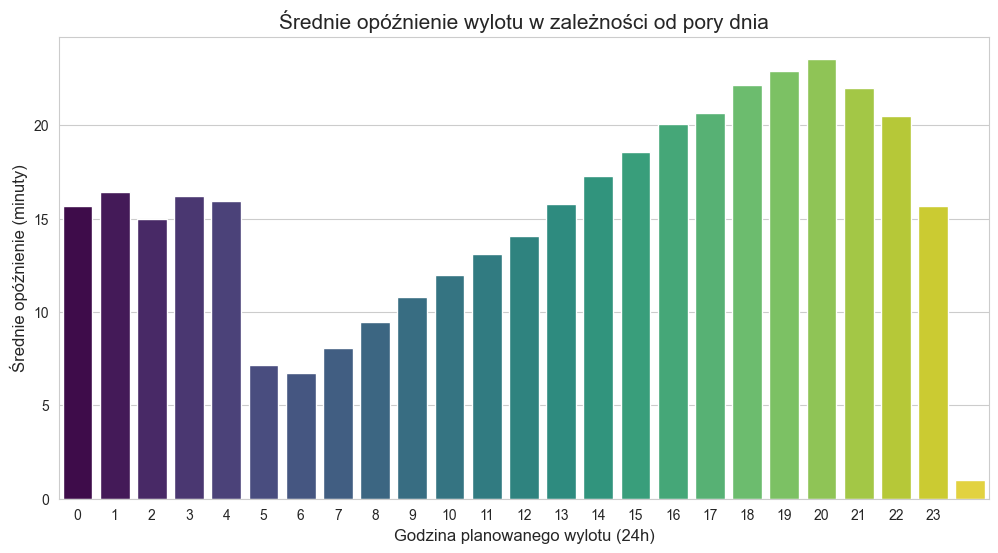

In [128]:
df['DepHour'] = (df['CRSDepTime'] // 100).astype(int)

# 2. Obliczamy średnie opóźnienie i odsetek spóźnionych lotów (DepDel15) na godzinę
hourly_stats = df.groupby('DepHour').agg({
    'DepDelay': 'mean',
    'DepDelayMinutes': 'mean'
}).reset_index()

# 3. Tworzenie wykresu
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Wykres słupkowy dla średniego opóźnienia
ax = sns.barplot(x='DepHour', y='DepDelayMinutes', data=hourly_stats, palette='viridis', hue='DepHour', legend=False)

# Dodanie kosmetyki
plt.title('Średnie opóźnienie wylotu w zależności od pory dnia', fontsize=15)
plt.xlabel('Godzina planowanego wylotu (24h)', fontsize=12)
plt.ylabel('Średnie opóźnienie (minuty)', fontsize=12)
plt.xticks(range(0, 24))

plt.show()

## Średnie opóźnienie przylotu w zależności od pory dnia

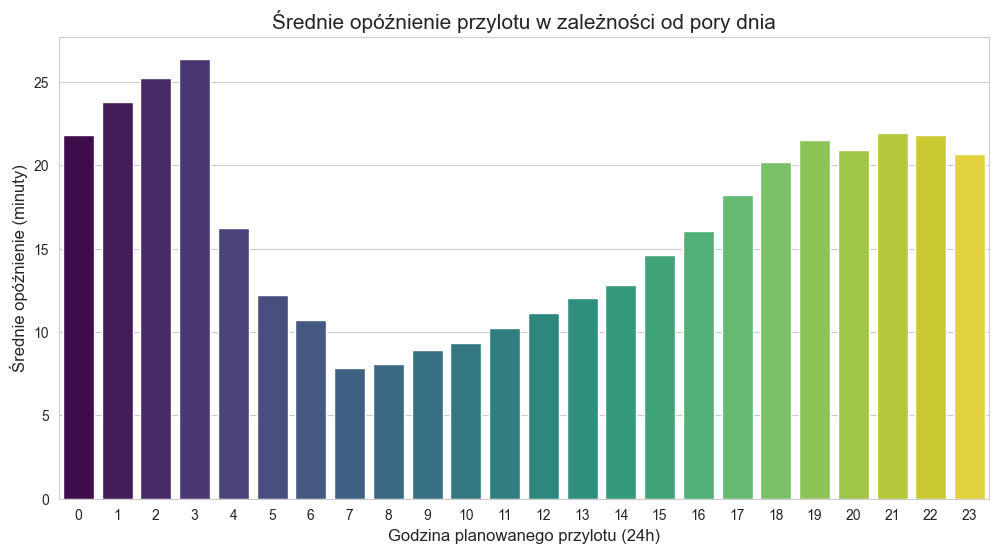

In [129]:
df['ArrHour'] = (df['CRSArrTime'] // 100).astype(int)

# 2. Obliczamy średnie opóźnienie i odsetek spóźnionych lotów (DepDel15) na godzinę
hourly_stats = df.groupby('ArrHour').agg({
    'ArrDelay': 'mean',
    'ArrDelayMinutes': 'mean'
}).reset_index()

# 3. Tworzenie wykresu
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Wykres słupkowy dla średniego opóźnienia
ax = sns.barplot(x='ArrHour', y='ArrDelayMinutes', data=hourly_stats, palette='viridis', hue='ArrHour', legend=False)

# Dodanie kosmetyki
plt.title('Średnie opóźnienie przylotu w zależności od pory dnia', fontsize=15)
plt.xlabel('Godzina planowanego przylotu (24h)', fontsize=12)
plt.ylabel('Średnie opóźnienie (minuty)', fontsize=12)
plt.xticks(range(0, 24))

plt.show()

## Prawdopodobieństwo opóźnienia (>15 min) w zależności od dnia tygodnia

C:\Users\jakub\AppData\Local\Temp\ipykernel_19756\536676292.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='DayName', y='DepDel15_Pct', data=weekday_stats, palette='coolwarm')


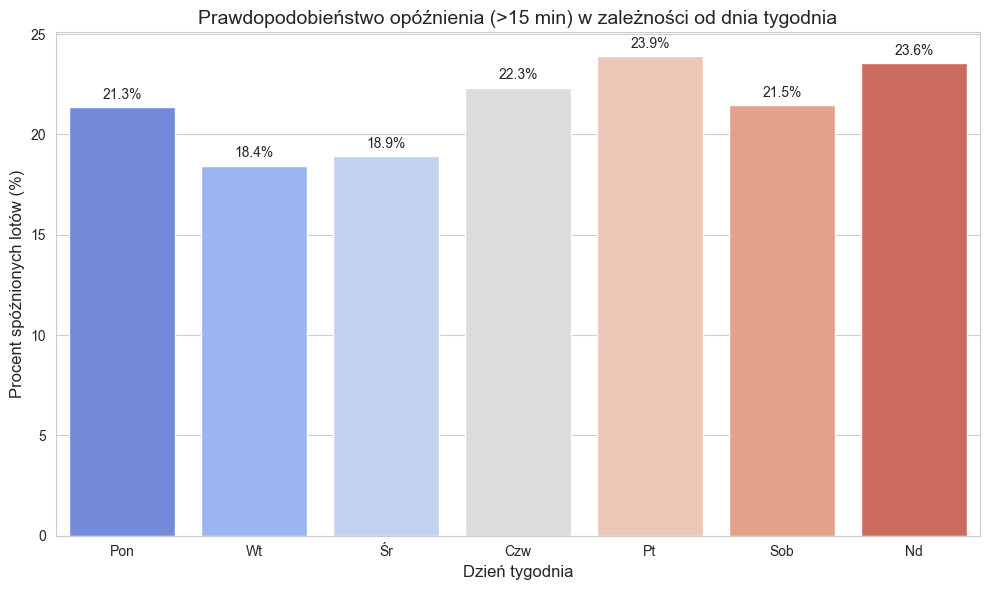

In [130]:
days_map = {1: 'Pon', 2: 'Wt', 3: 'Śr', 4: 'Czw', 5: 'Pt', 6: 'Sob', 7: 'Nd'}
df['DayName'] = df['DayOfWeek'].map(days_map)

# 2. Agregacja danych: średnie opóźnienie i % spóźnień powyżej 15 min
weekday_stats = df.groupby(['DayOfWeek', 'DayName']).agg({
    'DepDelay': 'mean',
    'DepDel15': 'mean'
}).reset_index()

# Zamiana ułamka na procent dla lepszej czytelności
weekday_stats['DepDel15_Pct'] = weekday_stats['DepDel15'] * 100

# 3. Tworzenie wykresu
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Rysujemy słupki dla procentu spóźnionych lotów
ax = sns.barplot(x='DayName', y='DepDel15_Pct', data=weekday_stats, palette='coolwarm')

# Dodajemy linię trendu dla średniego opóźnienia w minutach (na tej samej osi lub pomocniczej)
plt.title('Prawdopodobieństwo opóźnienia (>15 min) w zależności od dnia tygodnia', fontsize=14)
plt.xlabel('Dzień tygodnia', fontsize=12)
plt.ylabel('Procent spóźnionych lotów (%)', fontsize=12)

# Dodanie etykiet nad słupkami
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',# type: ignore
                (p.get_x() + p.get_width() / 2., p.get_height()), # type: ignore
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

## Sezonowość opóźnień lotów (odsetek opóźnień > 15 min)

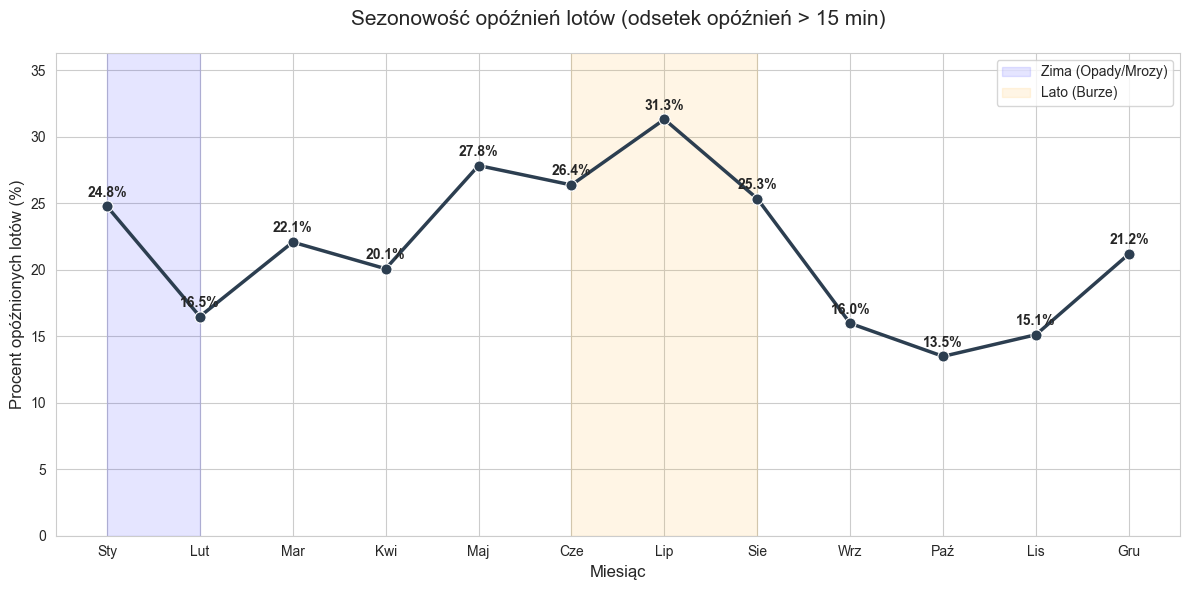

In [131]:
monthly_delays = df.groupby('Month')['ArrDel15'].mean() * 100

# 2. Tworzenie wykresu
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Rysowanie linii z punktami
ax = sns.lineplot(x=monthly_delays.index, y=monthly_delays.values, 
                  marker='o', markersize=8, color='#2c3e50', linewidth=2.5)

# 3. Dodanie cieniowania dla kluczowych okresów (Zima / Lato)
plt.axvspan(1, 2, color='blue', alpha=0.1, label='Zima (Opady/Mrozy)')
plt.axvspan(6, 8, color='orange', alpha=0.1, label='Lato (Burze)')

# 4. Personalizacja osi i tytułów
plt.title('Sezonowość opóźnień lotów (odsetek opóźnień > 15 min)', fontsize=15, pad=20)
plt.xlabel('Miesiąc', fontsize=12)
plt.ylabel('Procent opóźnionych lotów (%)', fontsize=12)
plt.xticks(range(1, 13), ['Sty', 'Lut', 'Mar', 'Kwi', 'Maj', 'Cze', 'Lip', 'Sie', 'Wrz', 'Paź', 'Lis', 'Gru'])
plt.ylim(0, monthly_delays.max() + 5) # Dynamiczny margines górny

# Dodanie etykiet danych nad punktami
for x, y in zip(monthly_delays.index, monthly_delays.values):
    plt.text(x, y + 0.5, f'{y:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()

## Wpływ świąt narodowych USA na opóźnienia lotów w 2024 r

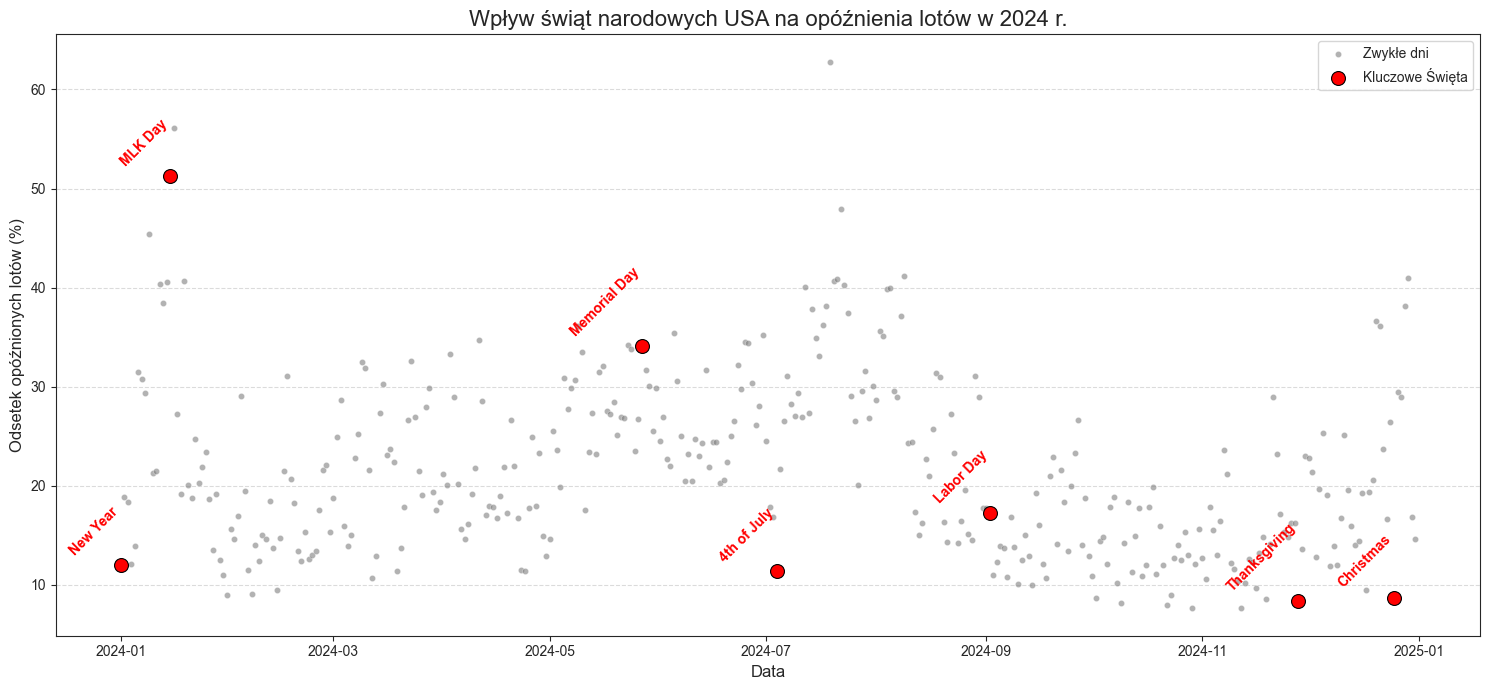

In [132]:
daily_delays = df.groupby('FlightDate')['ArrDel15'].mean().reset_index()

daily_delays['ArrDel15'] *= 100  # Konwersja na procenty
daily_delays['FlightDate'] = pd.to_datetime(daily_delays['FlightDate'])

# 2. Definicja kluczowych świąt w USA (2024)
holidays = {
    '2024-01-01': 'New Year',
    '2024-01-15': 'MLK Day',
    '2024-05-27': 'Memorial Day',
    '2024-07-04': '4th of July',
    '2024-09-02': 'Labor Day',
    '2024-11-28': 'Thanksgiving',
    '2024-12-25': 'Christmas'
}
holidays_dates = pd.to_datetime(list(holidays.keys()))

# 3. Tworzenie wykresu
plt.figure(figsize=(15, 7))
sns.set_style("ticks")

# Wykres punktowy dla wszystkich dni (tło)
sns.scatterplot(data=daily_delays, x='FlightDate', y='ArrDel15', 
                alpha=0.6, color='gray', s=20, label='Zwykłe dni')

# Wyróżnienie dni świątecznych
holiday_data = daily_delays[daily_delays['FlightDate'].isin(holidays_dates)]
sns.scatterplot(data=holiday_data, x='FlightDate', y='ArrDel15', 
                color='red', s=100, edgecolor='black', label='Kluczowe Święta')

# 4. Dodanie etykiet tekstowych dla świąt
for date, name in holidays.items():
    d_date = pd.to_datetime(date)
    # Pobranie wartości opóźnienia dla danego dnia, jeśli istnieje w danych
    if d_date in daily_delays['FlightDate'].values:
        y_val = daily_delays.loc[daily_delays['FlightDate'] == d_date, 'ArrDel15'].values[0]
        plt.text(d_date, y_val + 1, name, rotation=45, ha='right', fontsize=10, fontweight='bold', color='red')

# 5. Estetyka
plt.title('Wpływ świąt narodowych USA na opóźnienia lotów w 2024 r.', fontsize=16)
plt.ylabel('Odsetek opóźnionych lotów (%)', fontsize=12)
plt.xlabel('Data', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

## Efekt Kaskadowy

In [ ]:
# 1. Sprawdźmy, czy to faktycznie problem Marketing vs Operating
podejrzane = df[df.duplicated(subset=['FlightDate', 'Tail_Number', 'CRSDepTime'], keep=False)]

if not podejrzane.empty:
    print("Znaleziono zduplikowane loty! Oto one:")
    display(podejrzane[['Tail_Number', 'CRSDepTime', 'Marketing_Airline_Network', 'Operating_Airline', 'Flight_Number_Operating_Airline']])

# 2. NAPRAWA: Usuwamy duplikaty
# Zostawiamy tylko jeden (pierwszy) wiersz dla każdego unikalnego lotu danej maszyny o danej godzinie.
df_clean = df.drop_duplicates(subset=['FlightDate', 'Tail_Number', 'CRSDepTime'], keep='first').copy()

print(f"Liczba wierszy przed czyszczeniem: {len(df)}")
print(f"Liczba wierszy po czyszczeniu: {len(df_clean)}")

# Po tym kroku możesz ponownie przefiltrować 'df_clean' dla swojego wykresu kaskadowego

Znaleziono zduplikowane loty! Oto one:


Zmienna,Tail_Number,CRSDepTime,Marketing_Airline_Network,Operating_Airline,Flight_Number_Operating_Airline
183,N3123J,615,B6,B6,1097
189,N3123J,615,B6,B6,1097
1152,N3123J,1035,B6,B6,896
1160,N3123J,1035,B6,B6,896
1187,N3123J,1305,B6,B6,2552
...,...,...,...,...,...
3916099,N369NW,600,DL,DL,2178
3918388,N3123J,1355,B6,B6,1161
3918391,N3123J,1355,B6,B6,1161
3918500,N330DX,1205,DL,DL,663


Liczba wierszy przed czyszczeniem: 3824610
Liczba wierszy po czyszczeniu: 3820656


In [134]:
df_temp = df_clean.dropna(subset=['Tail_Number']).copy()

# 2. Sortujemy dane, aby ułożyć loty chronologicznie
df_temp = df_temp.sort_values(by=['FlightDate', 'Tail_Number', 'CRSDepTime'])

# 3. Tworzymy dwie nowe kolumny pomocnicze:
# - Flight_Seq: Który to jest lot tego samolotu w danym dniu (1, 2, 3...)
# - Total_Flights_Day: Ile w sumie lotów zrobił ten samolot tego dnia
df_temp['Flight_Seq'] = df_temp.groupby(['FlightDate', 'Tail_Number']).cumcount() + 1
df_temp['Total_Flights_Day'] = df_temp.groupby(['FlightDate', 'Tail_Number'])['CRSDepTime'].transform('count')

# 4. Filtrujemy dane w poszukiwaniu "zapalnika" (pierwszego opóźnionego lotu)
# CRSDepTime jest często w formacie HHMM, więc < 1000 oznacza przed 10:00 rano.
kandydaci = df_temp[
    (df_temp['Flight_Seq'] == 1) &          # To musi być pierwszy lot dnia
    (df_temp['CRSDepTime'] < 1000) &        # Zaplanowany przed 10:00 rano
    (df_temp['DepDelay'] > 60) &            # Opóźniony o ponad godzinę
    (df_temp['Total_Flights_Day'] >= 4)     # Samolot robi min. 4 loty tego dnia
]

# 5. Wyświetlamy najlepszych kandydatów (najbardziej zapracowane samoloty)
najlepsi_kandydaci = kandydaci[['FlightDate', 'Tail_Number', 'Origin', 'Dest', 'CRSDepTime', 'DepDelay', 'Total_Flights_Day']]
najlepsi_kandydaci = najlepsi_kandydaci.sort_values(by=['Total_Flights_Day', 'DepDelay'], ascending=[False, False])

print("Oto najlepsi kandydaci do analizy:")
print(najlepsi_kandydaci.head(10).to_string(index=False))

Oto najlepsi kandydaci do analizy:
FlightDate Tail_Number Origin Dest  CRSDepTime  DepDelay  Total_Flights_Day
2024-04-04      N566NN    PHL  DCA         551       244                  8
2024-05-20      N362FR    DEN  ATL          54        84                  8
2024-08-22      N114UW    DTW  PHL         540        80                  8
2024-05-23      N639RW    IND  ORD         600        70                  8
2024-08-08      N235FR    LAS  DEN          59        69                  8
2024-06-18      N337FR    CVG  DEN         520       302                  7
2024-08-06      N837AW    BNA  PHL         610       302                  7
2024-07-07      N279JB    DCA  BOS         700       262                  7
2024-12-19      N637NK    PHL  MCO         523       197                  7
2024-07-11      N313FR    LAS  LAX         722       194                  7


C:\Users\jakub\AppData\Local\Temp\ipykernel_19756\4017278268.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_aircraft = df_clean[(df['Tail_Number'] == wybrany_tail) & (df['FlightDate'] == wybrany_dzien)].copy()


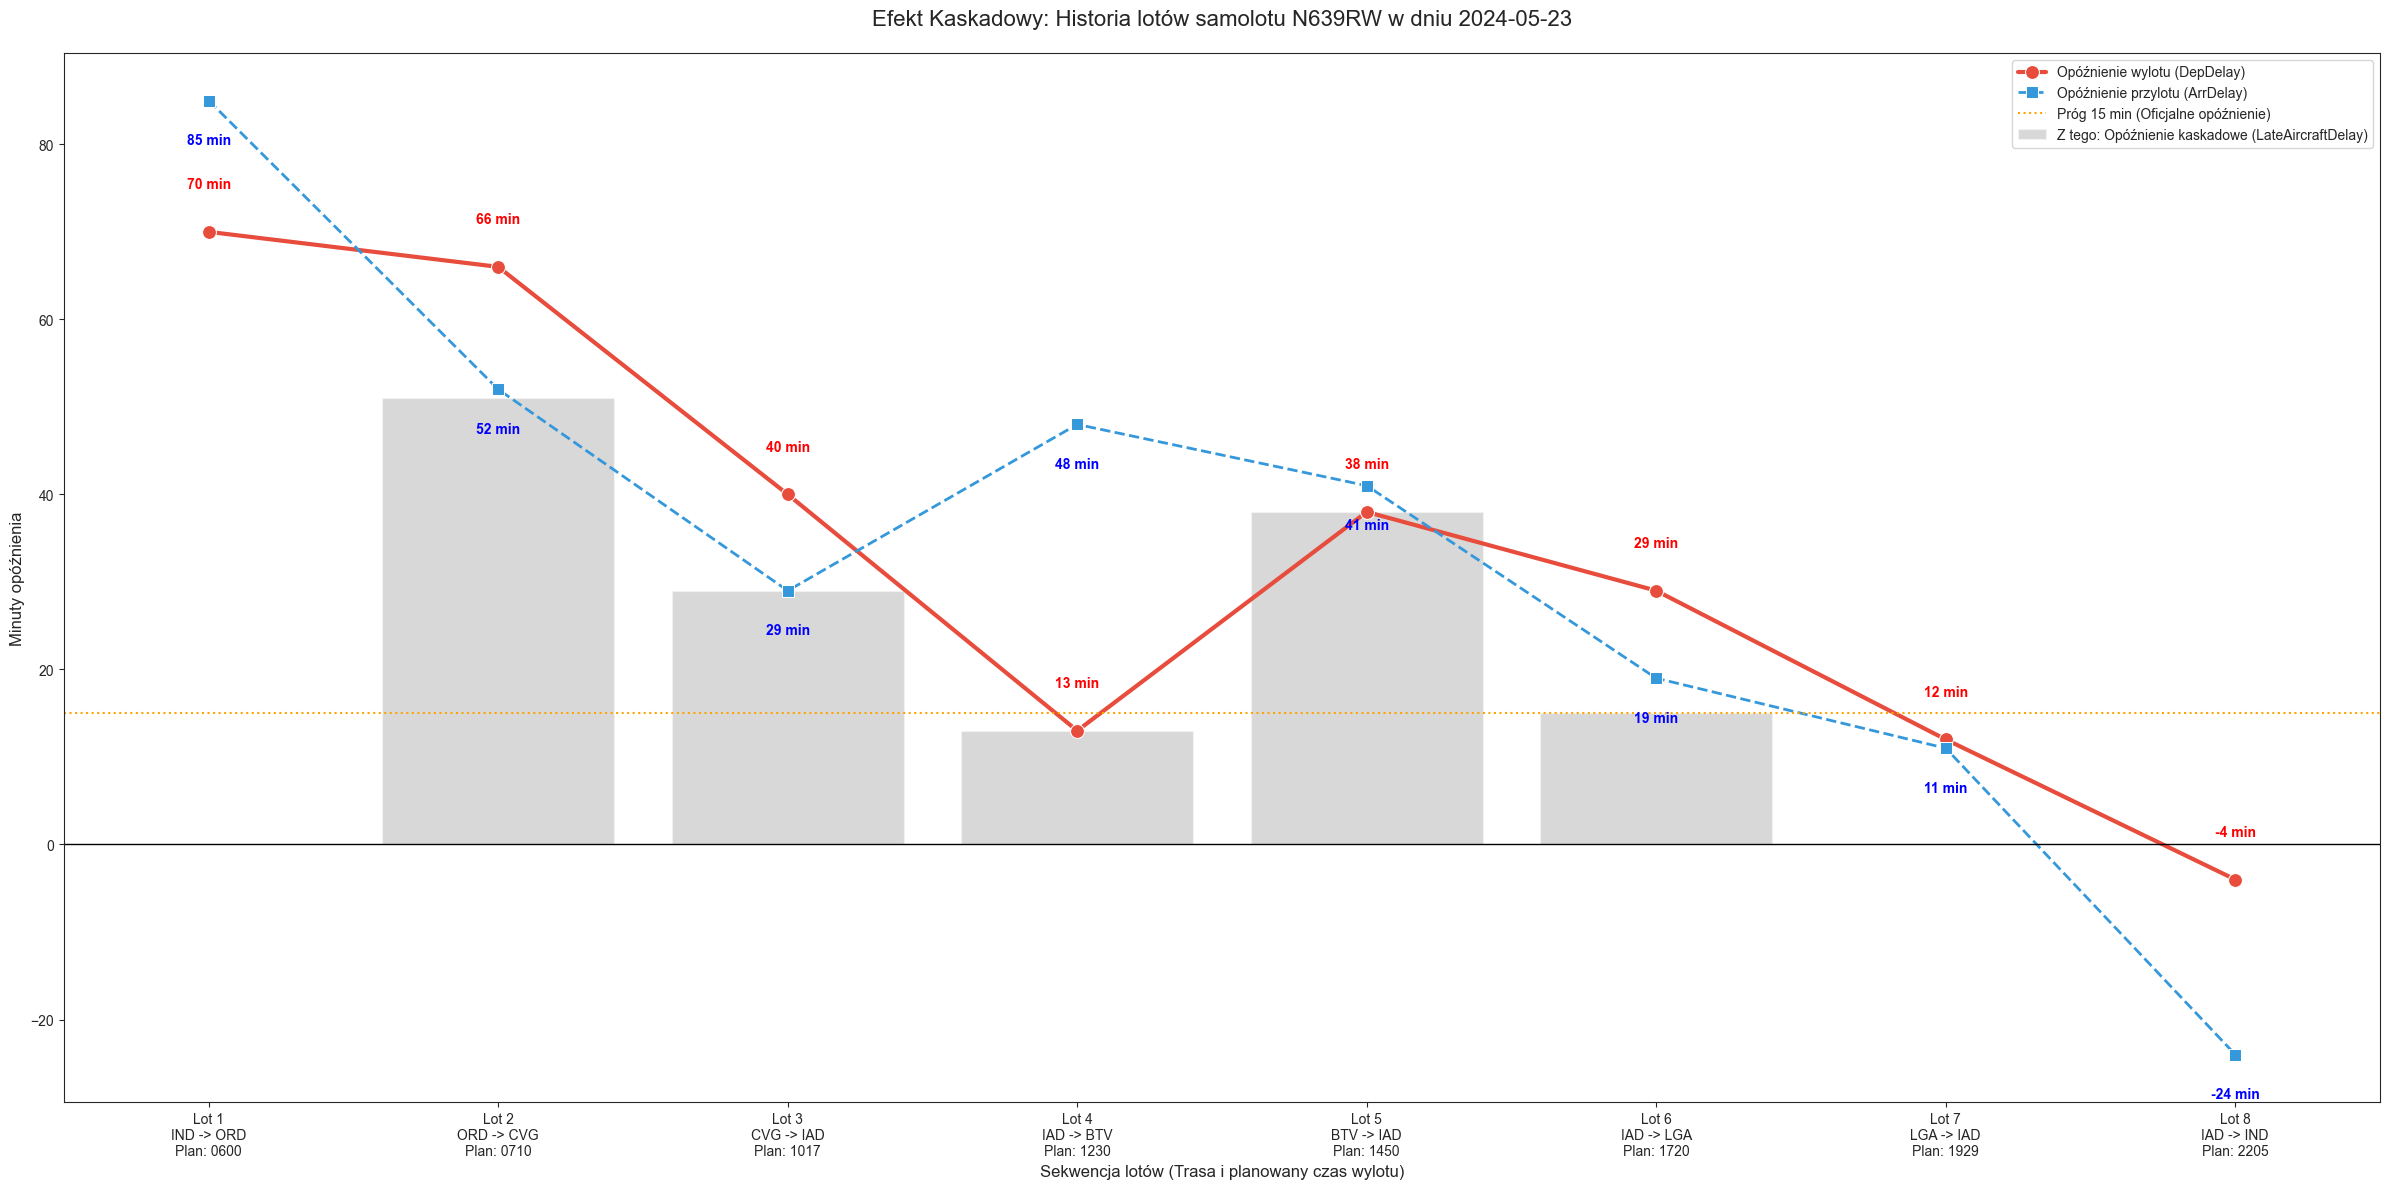

In [135]:
wybrany_tail = 'N639RW' # Przykładowy numer rejestracyjny (zmień na istniejący w Twoich danych)
wybrany_dzien = '2024-05-23' # Przykładowy dzień letnich burz

# Filtrowanie i sortowanie chronologiczne według planowanej godziny wylotu (CRSDepTime)
df_aircraft = df_clean[(df['Tail_Number'] == wybrany_tail) & (df['FlightDate'] == wybrany_dzien)].copy()
df_aircraft = df_aircraft.sort_values(by='CRSDepTime')

# Jeśli samolot wykonał loty tego dnia, tworzymy wizualizację
if not df_aircraft.empty:
    # 2. Przygotowanie etykiet dla osi X (Sekwencja lotów: Skąd -> Dokąd)
    # Dodajemy numerację lotów (1, 2, 3...) dla czytelności
    df_aircraft['Flight_Sequence'] = range(1, len(df_aircraft) + 1)
    df_aircraft['Route_Label'] = df_aircraft.apply(
        lambda row: f"Lot {row['Flight_Sequence']}\n{row['Origin']} -> {row['Dest']}\nPlan: {row['CRSDepTime']:04d}", 
        axis=1
    )

    # 3. Rysowanie wykresu
    plt.figure(figsize=(24, 12))
    
    # Rysujemy linię pokazującą opóźnienie wylotu (DepDelay)
    sns.lineplot(data=df_aircraft, x='Route_Label', y='DepDelay', 
                 marker='o', markersize=10, linewidth=3, color='#e74c3c', label='Opóźnienie wylotu (DepDelay)')
    
    # Rysujemy linię pokazującą opóźnienie przylotu (ArrDelay)
    sns.lineplot(data=df_aircraft, x='Route_Label', y='ArrDelay', 
                 marker='s', markersize=8, linewidth=2, color='#3498db', linestyle='--', label='Opóźnienie przylotu (ArrDelay)')

    # Rysujemy słupki pokazujące, jaka część opóźnienia to wina spóźnionego samolotu z poprzedniego rejsu
    # (LateAircraftDelay z reguły pojawia się od drugiego lotu)
    sns.barplot(data=df_aircraft, x='Route_Label', y='LateAircraftDelay', 
                color='gray', alpha=0.3, label='Z tego: Opóźnienie kaskadowe (LateAircraftDelay)')

    # 4. Estetyka wykresu
    plt.axhline(0, color='black', linewidth=1) # Linia zera (lot o czasie)
    plt.axhline(15, color='orange', linestyle=':', label='Próg 15 min (Oficjalne opóźnienie)')
    
    plt.title(f'Efekt Kaskadowy: Historia lotów samolotu {wybrany_tail} w dniu {wybrany_dzien}', fontsize=16, pad=20)
    plt.xlabel('Sekwencja lotów (Trasa i planowany czas wylotu)', fontsize=12)
    plt.ylabel('Minuty opóźnienia', fontsize=12)
    plt.xticks(rotation=0)
    
    # Dodanie wartości liczbowych nad punktami (dla DepDelay)
    for index, row in df_aircraft.iterrows():
        plt.text(row['Flight_Sequence'] - 1, row['DepDelay'] + 5, 
                 f"{row['DepDelay']} min", color='red', ha='center', fontweight='bold')
        plt.text(row['Flight_Sequence'] - 1, row['ArrDelay'] - 5, 
                 f"{row['ArrDelay']} min", color='blue', ha='center', fontweight='bold')

    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
else:
    print(f"Brak danych dla samolotu {wybrany_tail} w dniu {wybrany_dzien}.")

## Top 10 Lotnisk z najwyższym średnim opóźnieniem wylotu (Origin)

In [136]:
del df
gc.collect()
df = pd.read_parquet('./data/clean_data/final/final_df.parquet')

C:\Users\jakub\AppData\Local\Temp\ipykernel_19756\1649764123.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


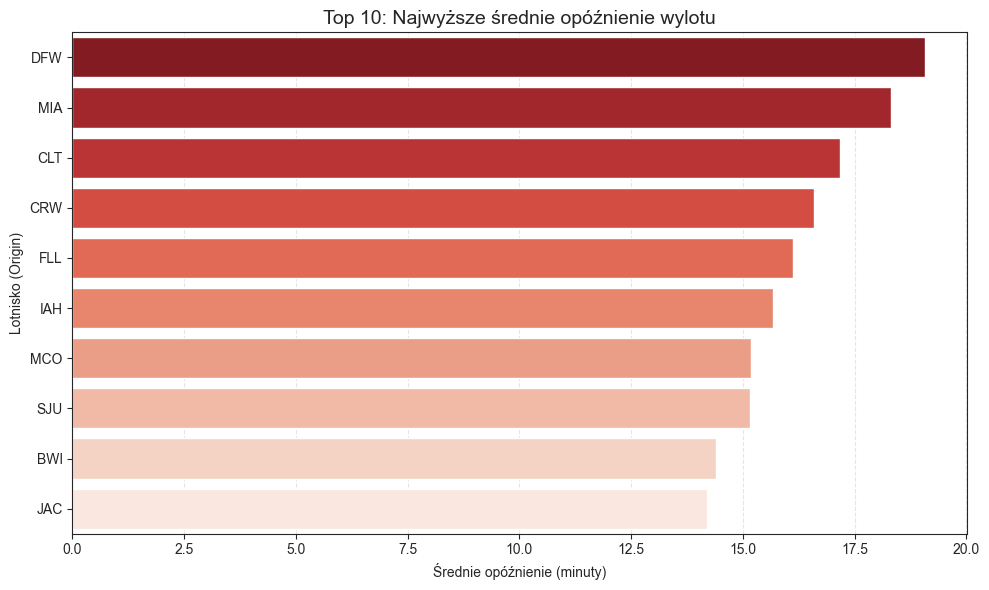

In [137]:
top_10 = df.groupby('Origin', observed=True)['DepDelay'].mean().sort_values(ascending=False).head(10)

# 2. Resetujemy indeks i konwertujemy 'Origin' na string, 
# aby pozbyć się ukrytych kategorii na osi Y
top_10_df = top_10.reset_index()
top_10_df['Origin'] = top_10_df['Origin'].astype(str)

# 3. Tworzenie wykresu
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_df, 
    x='DepDelay', 
    y='Origin', 
    palette='Reds_r'
)

# 4. Dodatki
plt.title('Top 10: Najwyższe średnie opóźnienie wylotu', fontsize=14)
plt.xlabel('Średnie opóźnienie (minuty)')
plt.ylabel('Lotnisko (Origin)')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## Top 10 Lotnisk z najwyższym średnim opóźnieniem przylotu (Dest)

C:\Users\jakub\AppData\Local\Temp\ipykernel_19756\708570286.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


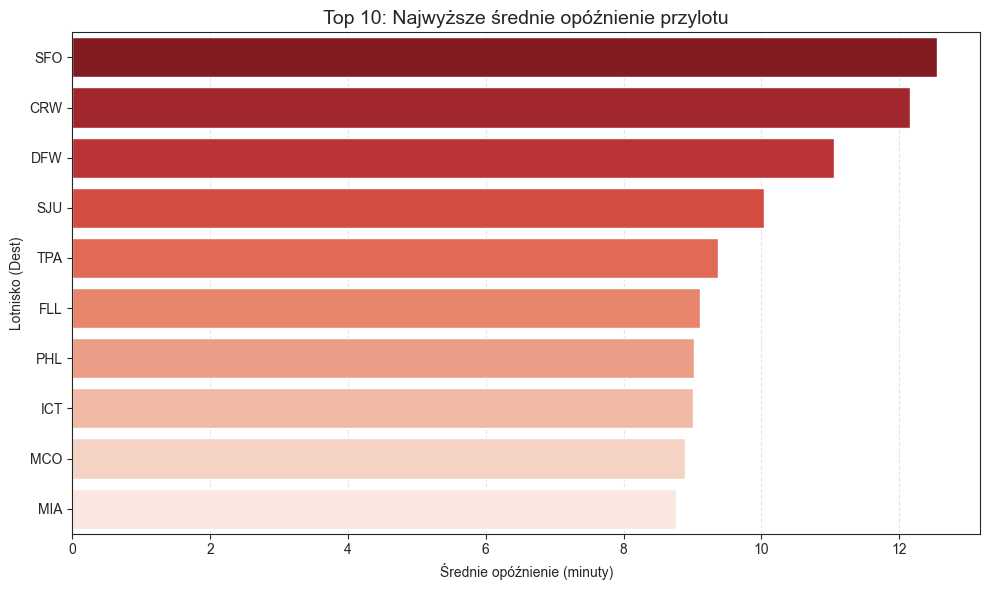

In [138]:
top_10 = df.groupby('Dest', observed=True)['ArrDelay'].mean().sort_values(ascending=False).head(10)

# 2. Resetujemy indeks i konwertujemy 'Origin' na string, 
# aby pozbyć się ukrytych kategorii na osi Y
top_10_df = top_10.reset_index()
top_10_df['Dest'] = top_10_df['Dest'].astype(str)

# 3. Tworzenie wykresu
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_df, 
    x='ArrDelay', 
    y='Dest', 
    palette='Reds_r'
)

# 4. Dodatki
plt.title('Top 10: Najwyższe średnie opóźnienie przylotu', fontsize=14)
plt.xlabel('Średnie opóźnienie (minuty)')
plt.ylabel('Lotnisko (Dest)')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## Mapa cieplna opóźnień: 20 najpopularniejszych tras

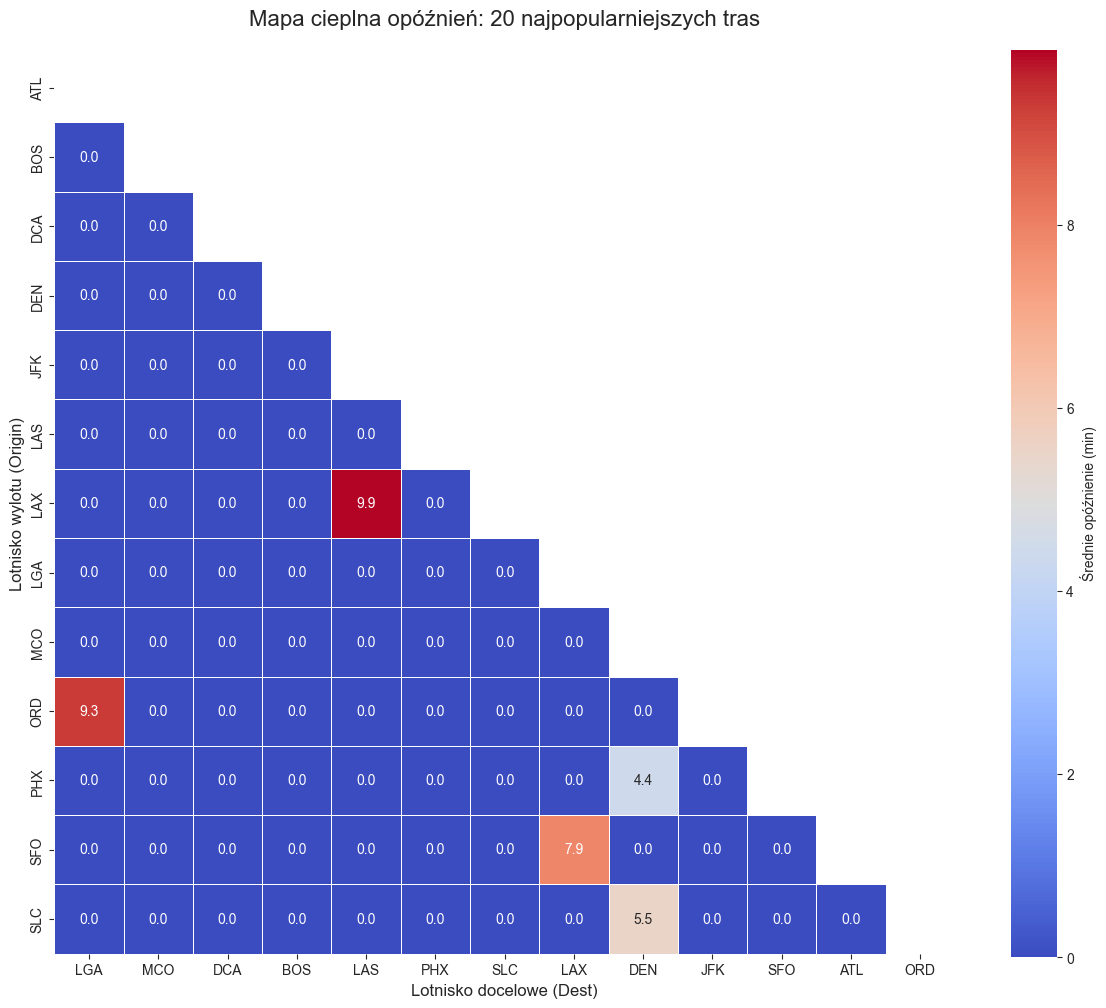

In [139]:
# 1. Stworzenie kolumny pomocniczej reprezentującej trasę (Origin-Dest)
df['Route'] = df['Origin'].astype(str) + '-' + df['Dest'].astype(str)

# 2. Znalezienie 20 najpopularniejszych tras (największa liczba lotów)
top_20_routes = df['Route'].value_counts().nlargest(20).index

# 3. Przefiltrowanie danych, aby zostawić tylko top 20 tras
df_top20 = df[df['Route'].isin(top_20_routes)]

# 4. Obliczenie średniego opóźnienia przylotu dla tych tras
# Używamy ArrDelay (w minutach). Możesz zmienić na ArrDel15, by badać % opóźnień.
route_delays = df_top20.groupby(['Origin', 'Dest'])['ArrDelay'].mean().reset_index()

# 5. Przekształcenie danych do formatu macierzy (pivot), wymaganego przez heatmapę
heatmap_data = route_delays.pivot(index='Origin', columns='Dest', values='ArrDelay')
heatmap_data = heatmap_data.fillna(0).astype(float)

mask = np.triu(np.ones_like(heatmap_data, dtype=bool), k=0)

# 2. Rysowanie heatmapy z parametrem 'mask'
plt.figure(figsize=(12, 10))
sns.heatmap(
    heatmap_data, 
    mask=mask,           # Tu nakładamy maskę
    annot=True, 
    cmap='coolwarm', 
    fmt=".1f",
    linewidths=.5,
    cbar_kws={'label': 'Średnie opóźnienie (min)'},
    square=True          # Sprawia, że komórki są idealnymi kwadratami
)

# Kosmetyka wykresu
plt.title('Mapa cieplna opóźnień: 20 najpopularniejszych tras', fontsize=16, pad=20)
plt.xlabel('Lotnisko docelowe (Dest)', fontsize=12)
plt.ylabel('Lotnisko wylotu (Origin)', fontsize=12)
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

## Zależność między dystansem lotu a opóźnieniem przylotu

In [140]:
del df
gc.collect()
df = pd.read_parquet('./data/clean_data/final/final_df.parquet')

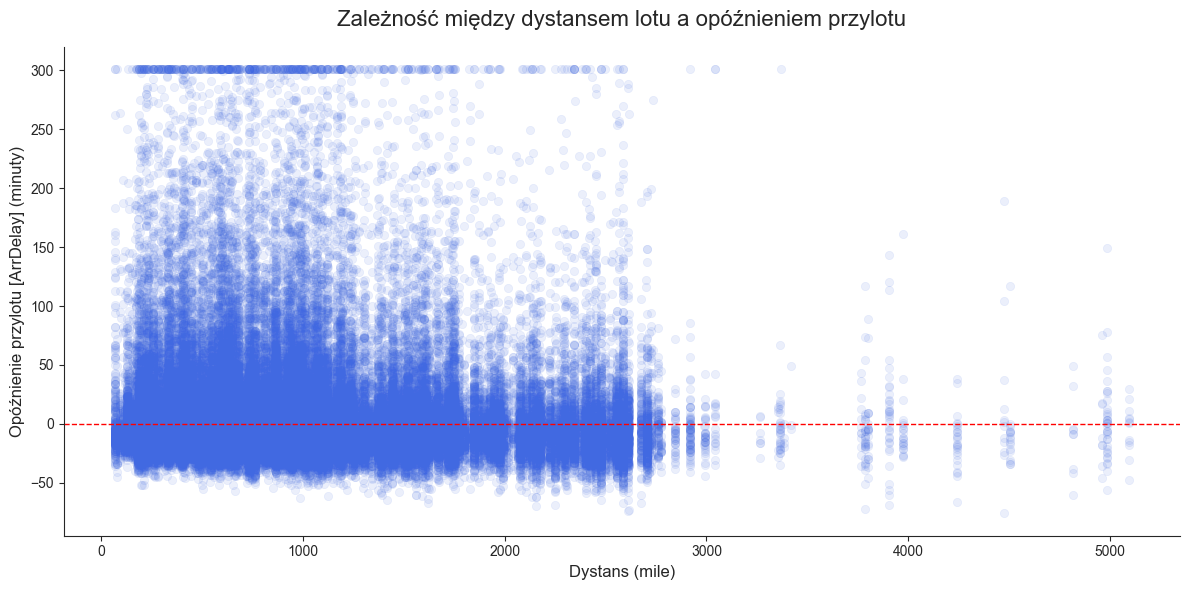

In [141]:
columns_needed = ['Distance', 'ArrDelay']
df_scatter = df[columns_needed].copy()

# 2. Oczyszczenie danych z braków (NaN), które mogłyby zaburzyć wykres
df_scatter = df_scatter.dropna()

# Opcjonalnie: Jeśli zbiór jest bardzo duży (np. miliony wierszy), 
# wykres rozrzutu może generować się długo. Możesz wtedy odkomentować poniższą linię:
df_scatter = df_scatter.sample(n=100000, random_state=42)

# 3. Rysowanie wykresu
plt.figure(figsize=(12, 6))

# Używamy alpha=0.1, aby widzieć zagęszczenie punktów (im ciemniej, tym więcej lotów)
sns.scatterplot(
    data=df_scatter, 
    x='Distance', 
    y='ArrDelay', 
    alpha=0.1, 
    color='royalblue',
    edgecolor=None # Wyłączenie krawędzi punktów poprawia czytelność przy dużych zbiorach
)

# 4. Formatowanie wykresu
plt.title('Zależność między dystansem lotu a opóźnieniem przylotu', fontsize=16, pad=15)
plt.xlabel('Dystans (mile)', fontsize=12)
plt.ylabel('Opóźnienie przylotu [ArrDelay] (minuty)', fontsize=12)

# Dodanie poziomej linii oznaczającej punkt "0" (brak opóźnienia/przylot o czasie)
plt.axhline(0, color='red', linestyle='--', linewidth=1)

# Usunięcie górnej i prawej osi dla lepszej estetyki
sns.despine()

plt.tight_layout()
plt.show()

## Wpływ temperatury na lotnisku startowym na opóźnienie startu

C:\Users\jakub\AppData\Local\Temp\ipykernel_19756\1628250168.py:35: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\jakub\Desktop\Projekty\projekt-wlasny\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


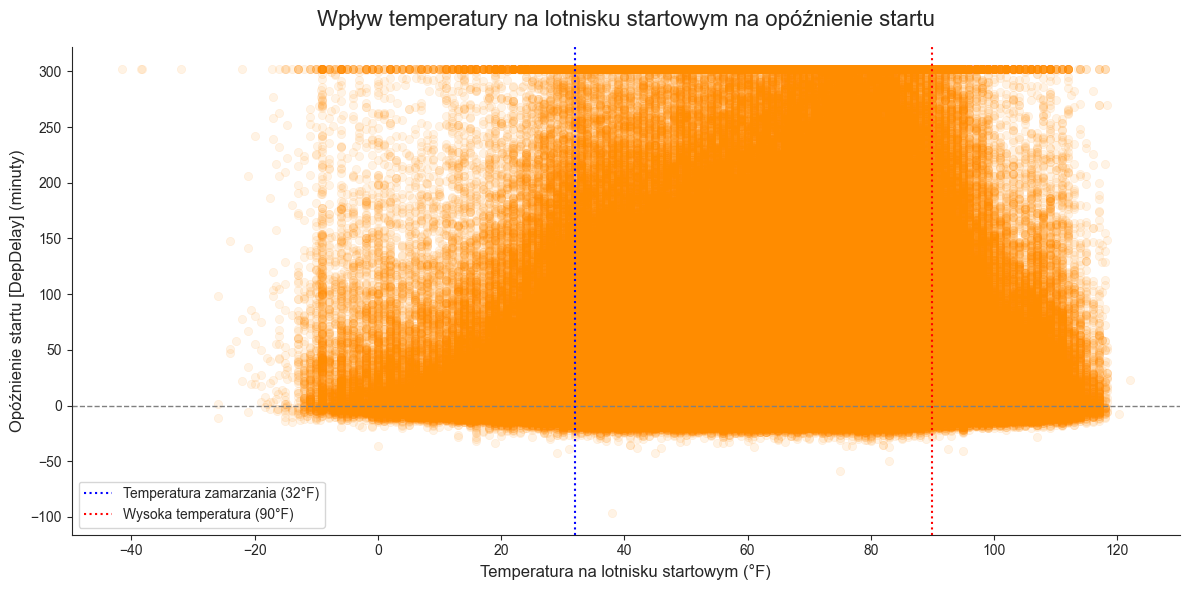

In [142]:
columns_needed = ['origin_tmpf', 'DepDelay']
df_temp = df[columns_needed].copy()

# 2. Oczyszczenie danych z braków (NaN)
df_temp = df_temp.dropna()

# 3. Przygotowanie wykresu
plt.figure(figsize=(12, 6))

# Rysowanie wykresu rozrzutu
sns.scatterplot(
    data=df_temp, 
    x='origin_tmpf', 
    y='DepDelay', 
    alpha=0.1,        # Niska wartość alpha ułatwia odczytanie zagęszczenia w dużych zbiorach
    color='darkorange',
    edgecolor=None
)

# 4. Formatowanie i dodatki ułatwiające interpretację
plt.title('Wpływ temperatury na lotnisku startowym na opóźnienie startu', fontsize=16, pad=15)
plt.xlabel('Temperatura na lotnisku startowym (°F)', fontsize=12)
plt.ylabel('Opóźnienie startu [DepDelay] (minuty)', fontsize=12)

# Linia oznaczająca brak opóźnienia
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Orientacyjne linie oznaczające skrajne temperatury (np. zamarzanie wody 32°F i upał 90°F)
plt.axvline(32, color='blue', linestyle=':', linewidth=1.5, label='Temperatura zamarzania (32°F)')
plt.axvline(90, color='red', linestyle=':', linewidth=1.5, label='Wysoka temperatura (90°F)')

plt.legend()
sns.despine()

plt.tight_layout()
plt.show()

## Odsetek opóźnionych lotów w zależności od siły wiatru

C:\Users\jakub\AppData\Local\Temp\ipykernel_19756\2015649030.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


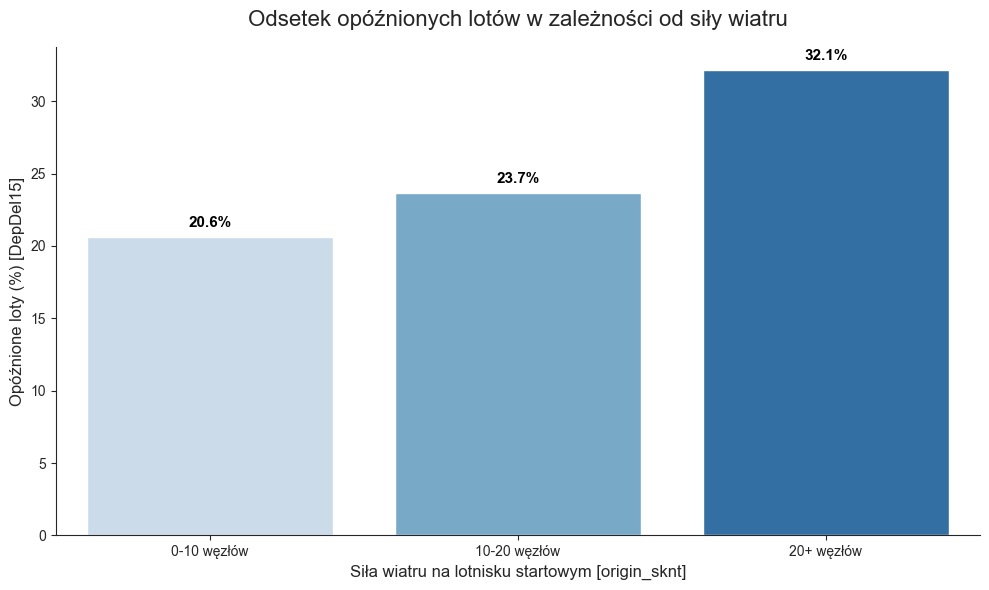

In [143]:
columns_needed = ['origin_sknt', 'DepDel15']
df_wind = df[columns_needed].copy()

# 2. Oczyszczenie danych z braków (NaN)
df_wind = df_wind.dropna()

# 3. Kategoryzacja siły wiatru (tworzenie koszyków)
# Definiujemy przedziały: 0-10, 10-20, i 20+ (używamy np.inf jako nieskończoności)
bins = [0, 10, 20, np.inf]
labels = ['0-10 węzłów', '10-20 węzłów', '20+ węzłów']

df_wind['Wind_Category'] = pd.cut(
    df_wind['origin_sknt'], 
    bins=bins, 
    labels=labels, 
    right=True, 
    include_lowest=True
)

# 4. Obliczenie odsetka opóźnionych lotów (>15 min) dla każdego koszyka
# Mnożymy przez 100, aby otrzymać procenty
delay_percentage = df_wind.groupby('Wind_Category')['DepDel15'].mean() * 100
delay_percentage = delay_percentage.reset_index()

# 5. Przygotowanie wykresu słupkowego
plt.figure(figsize=(10, 6))

# Rysowanie słupków
ax = sns.barplot(
    data=delay_percentage, 
    x='Wind_Category', 
    y='DepDel15', 
    palette='Blues' # Kolorystyka kojarząca się z wiatrem/powietrzem
)

# 6. Formatowanie i dodanie wartości na szczytach słupków
plt.title('Odsetek opóźnionych lotów w zależności od siły wiatru', fontsize=16, pad=15)
plt.xlabel('Siła wiatru na lotnisku startowym [origin_sknt]', fontsize=12)
plt.ylabel('Opóźnione loty (%) [DepDel15]', fontsize=12)

# Pętla dodająca procenty nad słupkami dla precyzyjnego odczytu
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', 
                fontsize=11, fontweight='bold', color='black', 
                xytext=(0, 5), textcoords='offset points')

sns.despine()

plt.tight_layout()
plt.show()

## Rozkład opóźnień startu: Dobra pogoda vs Deszcz/Śnieg/Mgła

C:\Users\jakub\AppData\Local\Temp\ipykernel_19756\2030838280.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


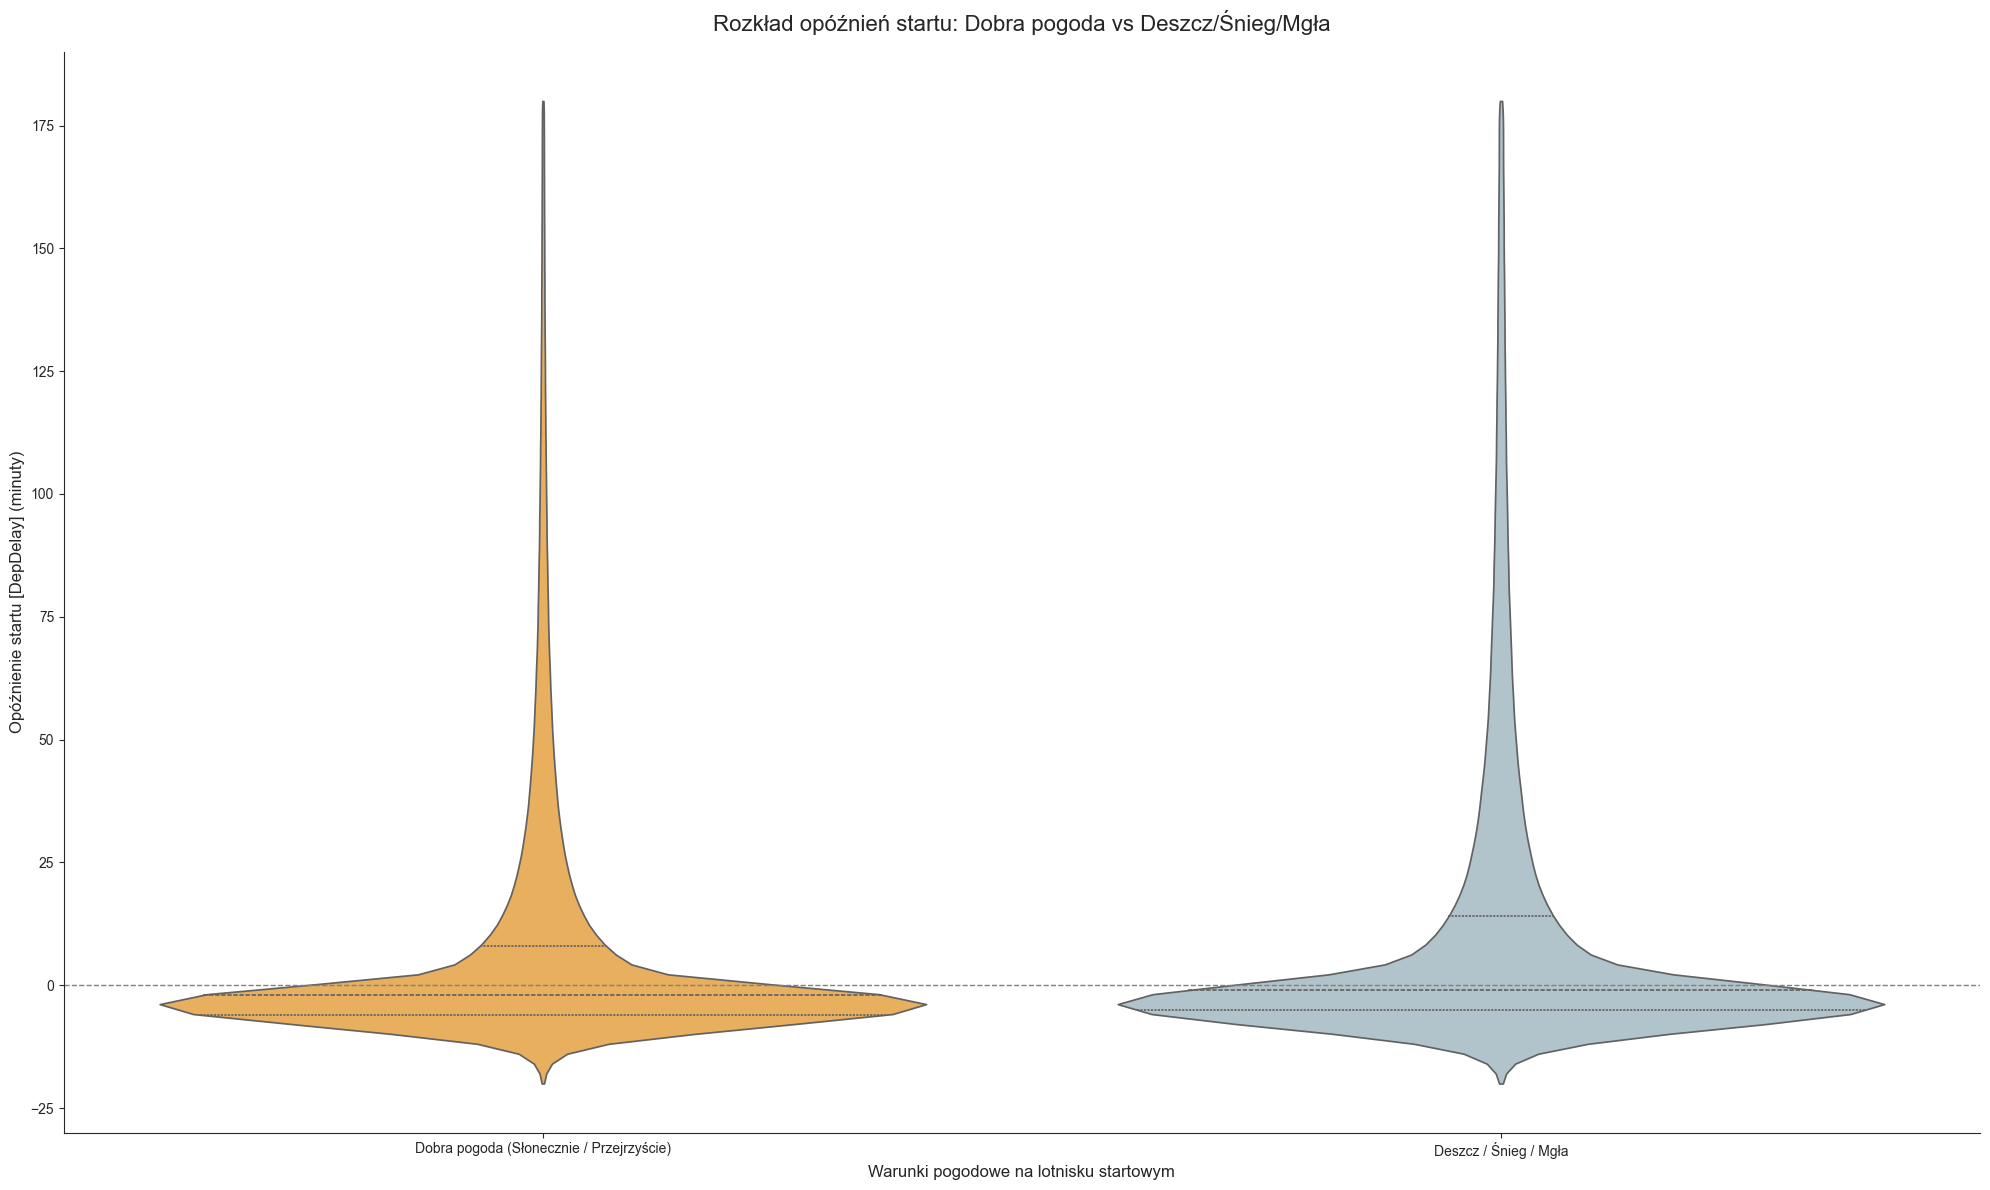

In [144]:
columns_needed = ['DepDelay', 'origin_precip', 'origin_snow', 'origin_vsby']
df_weather = df[columns_needed].copy()

# 2. Usunięcie braków danych
df_weather = df_weather.dropna()

# 3. Definicja warunków pogodowych
# Zakładamy złą pogodę (mgła/opady), gdy:
# - widoczność (vsby) jest mniejsza lub równa 5 mil (często próg dla mgły/zamglenia)
# - LUB opady (precip) są większe od 0
# - LUB pada śnieg (snow == True)
bad_weather_cond = (
    (df_weather['origin_vsby'] <= 5) | 
    (df_weather['origin_precip'] > 0) | 
    (df_weather['origin_snow'] == True)
)

# Tworzenie nowej kolumny kategoryzującej pogodę
df_weather['Weather_Condition'] = np.where(
    bad_weather_cond, 
    'Deszcz / Śnieg / Mgła', 
    'Dobra pogoda (Słonecznie / Przejrzyście)'
)

# 4. Opcjonalne filtrowanie ekstremalnych wartości (Outliers)
# Wykresy wiolinowe tracą czytelność, gdy w danych są pojedyncze, ogromne wartości (np. opóźnienie 1000 min).
# Ograniczamy analizę wizualną do lotów z opóźnieniem między -20 a 180 minut.
df_filtered = df_weather[(df_weather['DepDelay'] >= -20) & (df_weather['DepDelay'] <= 180)]

# 5. Przygotowanie wykresu
plt.figure(figsize=(20, 12))

sns.violinplot(
    data=df_filtered, 
    x='Weather_Condition', 
    y='DepDelay', 
    palette=['#FFB347', '#AEC6CF'], # Pomarańczowy dla słońca, szaro-niebieski dla złej pogody
    inner='quartile',               # Pokazuje kwartyle wewnątrz wiolonczeli
    cut=0                           # Przycina końce do rzeczywistych danych
)

# 6. Formatowanie wykresu
plt.title('Rozkład opóźnień startu: Dobra pogoda vs Deszcz/Śnieg/Mgła', fontsize=16, pad=15)
plt.xlabel('Warunki pogodowe na lotnisku startowym', fontsize=12)
plt.ylabel('Opóźnienie startu [DepDelay] (minuty)', fontsize=12)

# Linia oznaczająca brak opóźnienia
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

sns.despine()

plt.tight_layout()
plt.show()

## Rozkład opóźnień przylotu [ArrDelay]

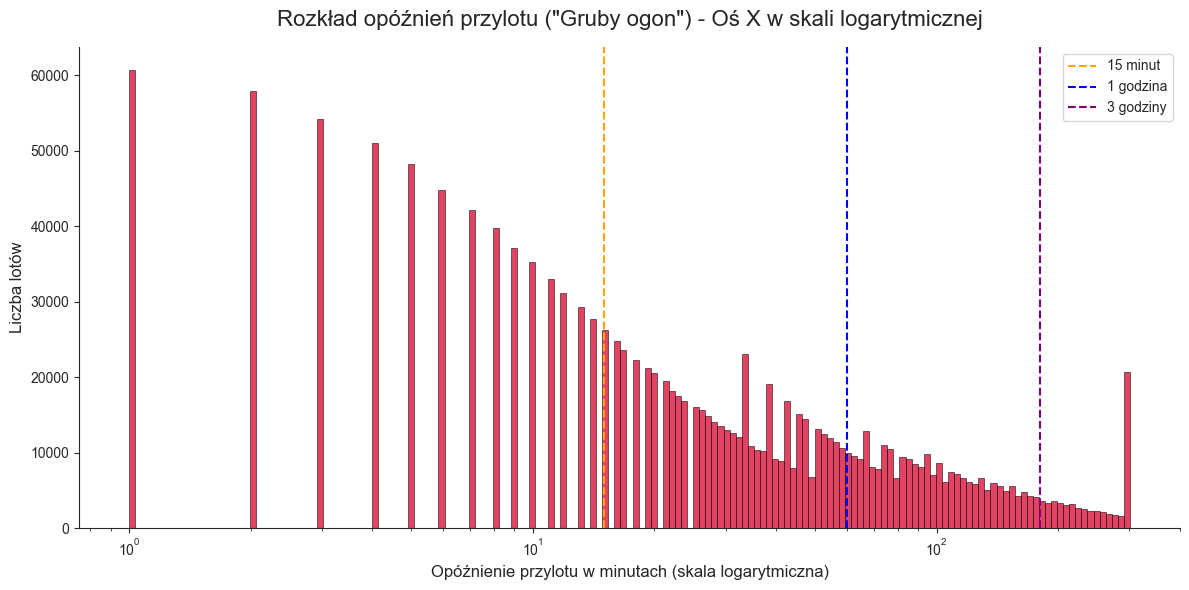


Przy 4 milionach wierszy i danych wyrażonych w pełnych liczbach całkowitych (minuty 1, 2, 3 itd.) zjawisko "dziwnego" wykresu na skali logarytmicznej osi X to znany problem tzw. "efekt grzebienia"
Dzieje się tak, ponieważ skala logarytmiczna osi X naturalnie rozszerza wartości bliskie zera, a ponieważ nie masz ułamków minut (np. 1.25 minuty), algorytm tworzy puste "koszyki" między liczbami całkowitymi.
Zamiast logarytmować oś X, zastosujemy logarytm na osi Y (aby miliony małych opóźnień nie przykryły tysięcy dużych).



In [145]:
columns_needed = ['ArrDelayMinutes']
df_target = df[columns_needed].copy()

# 2. Usunięcie braków danych
df_target = df_target.dropna()

# 3. Odfiltrowanie zer (skupiamy się tylko na faktycznych opóźnieniach)
# Zera zdominowałyby wykres, a z matematycznego punktu widzenia logarytm z 0 nie istnieje.
df_delayed_only = df_target

# 4. Przygotowanie wykresu
plt.figure(figsize=(12, 6))

# Rysowanie histogramu z automatycznym logarytmem na osi X
sns.histplot(
    data=df_delayed_only,
    x='ArrDelayMinutes',
    log_scale=True,      # Magia Seaborn: automatycznie logarytmuje oś X i dostosowuje szerokość koszyków
    color='crimson',     # Używamy np. karmazynowego koloru dla opóźnień
    edgecolor='black',
    alpha=0.8
)

# 5. Formatowanie wykresu
plt.title('Rozkład opóźnień przylotu ("Gruby ogon") - Oś X w skali logarytmicznej', fontsize=16, pad=15)
plt.xlabel('Opóźnienie przylotu w minutach (skala logarytmiczna)', fontsize=12)
plt.ylabel('Liczba lotów', fontsize=12)

# Opcjonalnie: Dodanie linii w ważnych punktach opóźnienia (np. 15 min, 60 min)
# Musimy nałożyć je na zlogarytmowaną oś
plt.axvline(15, color='orange', linestyle='--', linewidth=1.5, label='15 minut')
plt.axvline(60, color='blue', linestyle='--', linewidth=1.5, label='1 godzina')
plt.axvline(180, color='purple', linestyle='--', linewidth=1.5, label='3 godziny')

plt.legend()
sns.despine()

plt.tight_layout()
plt.show()
print("""
Przy 4 milionach wierszy i danych wyrażonych w pełnych liczbach całkowitych (minuty 1, 2, 3 itd.) zjawisko "dziwnego" wykresu na skali logarytmicznej osi X to znany problem tzw. "efekt grzebienia"
Dzieje się tak, ponieważ skala logarytmiczna osi X naturalnie rozszerza wartości bliskie zera, a ponieważ nie masz ułamków minut (np. 1.25 minuty), algorytm tworzy puste "koszyki" między liczbami całkowitymi.
Zamiast logarytmować oś X, zastosujemy logarytm na osi Y (aby miliony małych opóźnień nie przykryły tysięcy dużych).
""")

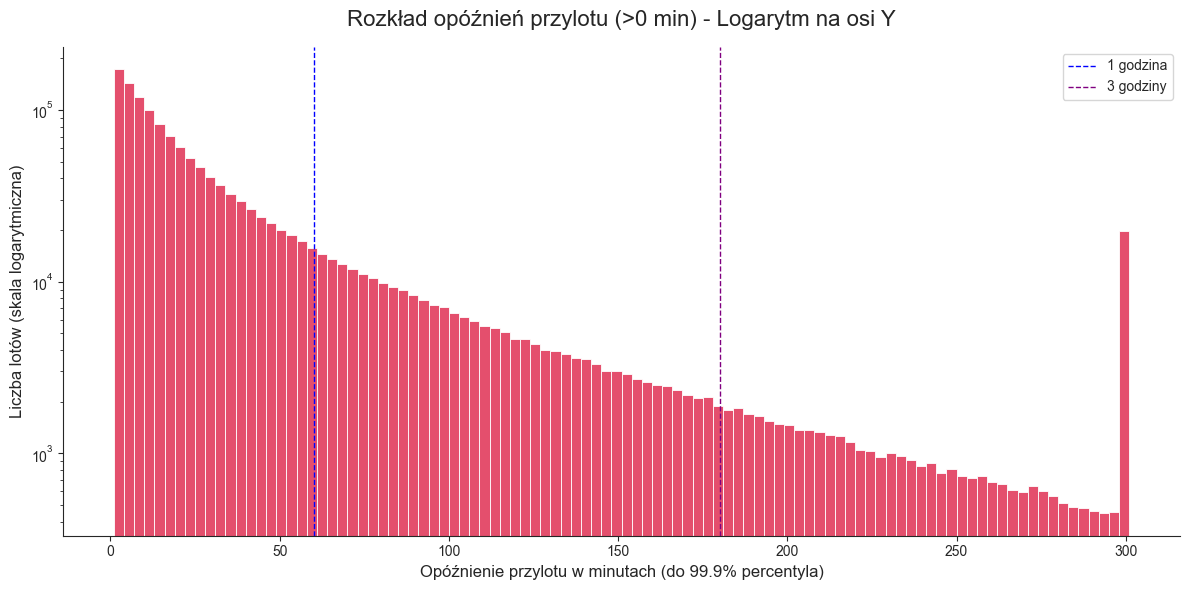

In [152]:
df_target = df[['ArrDelayMinutes']].copy().dropna()

# 2. Skupiamy się tylko na opóźnieniach (>0)
df_delayed = df_target[df_target['ArrDelayMinutes'] > 0]

# 3. Odcinamy ekstremalne anomalie (np. 0.1% najbardziej absurdalnych opóźnień)
# Pozwoli to osi X skupić się na właściwym, grubym ogonie, a nie na jednym błędzie w danych.
# q999 = df_delayed['ArrDelayMinutes'].quantile(0.999)
# df_filtered = df_delayed[df_delayed['ArrDelayMinutes'] <= q999]
df_filtered = df_delayed
# 4. Rysowanie wykresu
plt.figure(figsize=(12, 6))

sns.histplot(
    data=df_filtered,
    x='ArrDelayMinutes',
    bins=100,            # 100 koszyków da płynny kształt
    color='crimson',
    edgecolor=None       # KLUCZOWE przy dużej liczbie bins/danych - zapobiega zlewaniu się w czerń
)

# 5. Skala logarytmiczna na osi Y! 
# To ona pokaże nam, że lotów opóźnionych o 300 minut są setki, a tych o 10 minut - setki tysięcy
plt.yscale('log')

# 6. Formatowanie
plt.title('Rozkład opóźnień przylotu (>0 min) - Logarytm na osi Y', fontsize=16, pad=15)
plt.xlabel('Opóźnienie przylotu w minutach (do 99.9% percentyla)', fontsize=12)
plt.ylabel('Liczba lotów (skala logarytmiczna)', fontsize=12)

# Opcjonalne linie informacyjne
plt.axvline(60, color='blue', linestyle='--', linewidth=1, label='1 godzina')
plt.axvline(180, color='purple', linestyle='--', linewidth=1, label='3 godziny')

plt.legend()
sns.despine()

plt.tight_layout()
plt.show()

## Nadrabianie czasu w powietrzu: Opóźnienie Wylotu vs Przylotu

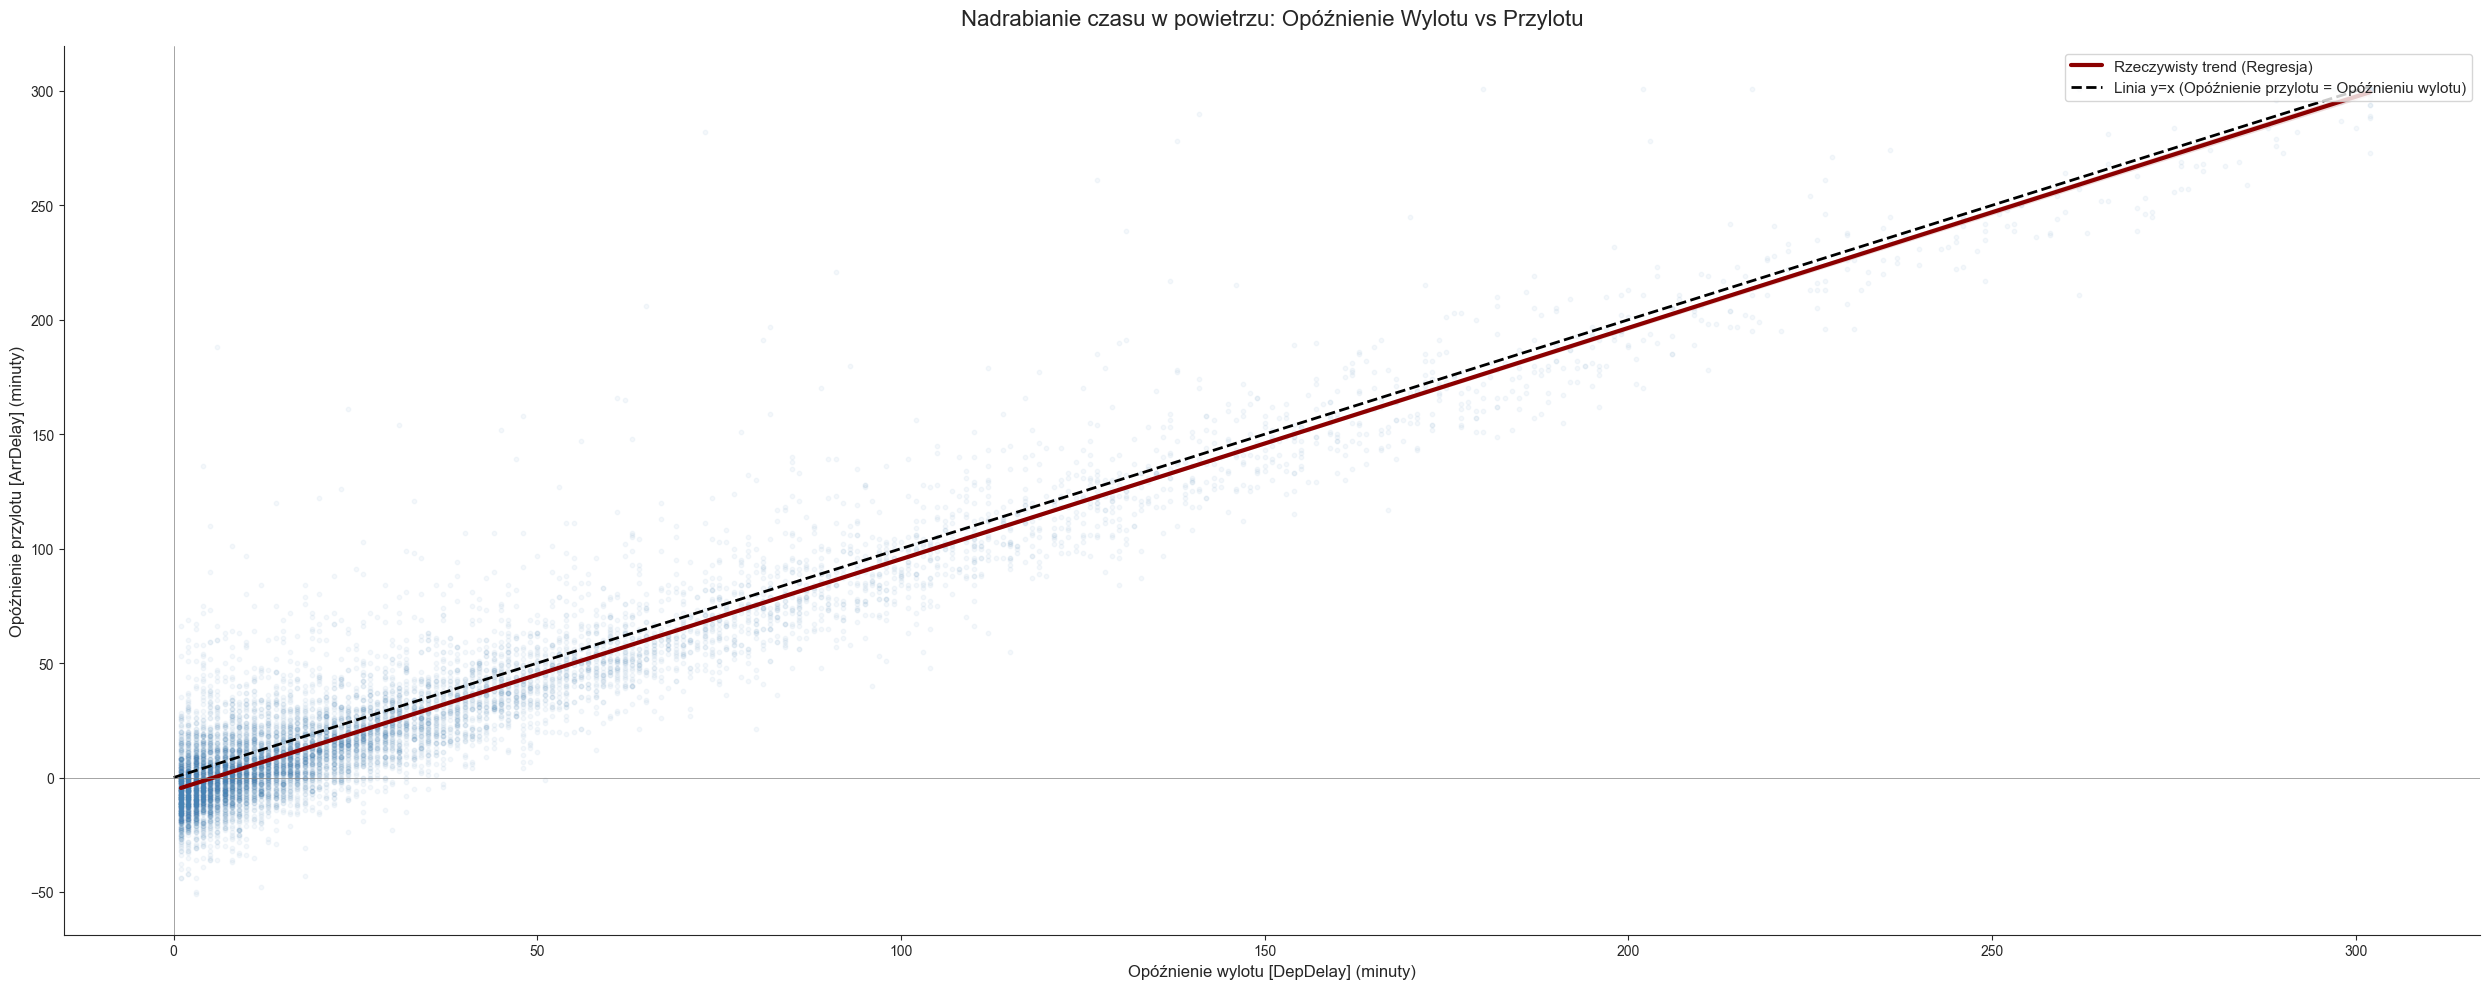

In [147]:
columns_needed = ['DepDelay', 'ArrDelay']
df_catchup = df[columns_needed].copy()

# 2. Usunięcie braków danych
df_catchup = df_catchup.dropna()

# 3. Ograniczenie skrajnych anomalii dla czytelności (np. odcinamy loty opóźnione > 10 godzin)
# Pozwala to skupić się na zjawisku, które dotyczy 99% lotów
df_catchup = df_catchup[(df_catchup['DepDelay'] > 0) & (df_catchup['DepDelay'] < 600)]

# 4. PRÓBKOWANIE - kluczowe przy 4 mln wierszy! Wybieramy losowe 100 tys. wierszy.
if len(df_catchup) > 100000:
    df_sample = df_catchup.sample(n=10000, random_state=42)
else:
    df_sample = df_catchup

# 5. Przygotowanie wykresu
plt.figure(figsize=(25, 10))

# Rysowanie wykresu rozrzutu z linią trendu (regresji)
sns.regplot(
    data=df_sample, 
    x='DepDelay', 
    y='ArrDelay',
    scatter_kws={'alpha': 0.05, 'color': 'steelblue', 's': 10}, # s to rozmiar punktu
    line_kws={'color': 'darkred', 'linewidth': 3, 'label': 'Rzeczywisty trend (Regresja)'}
)

# 6. Dodanie linii "Brak nadrabiania czasu" (y = x)
# Pobieramy obecne limity osi, aby narysować równą przekątną
max_delay = max(df_sample['DepDelay'].max(), df_sample['ArrDelay'].max())
plt.plot(
    [0, max_delay], [0, max_delay], 
    color='black', linestyle='--', linewidth=2, 
    label='Linia y=x (Opóźnienie przylotu = Opóźnieniu wylotu)'
)

# 7. Formatowanie wykresu
plt.title('Nadrabianie czasu w powietrzu: Opóźnienie Wylotu vs Przylotu', fontsize=16, pad=15)
plt.xlabel('Opóźnienie wylotu [DepDelay] (minuty)', fontsize=12)
plt.ylabel('Opóźnienie przylotu [ArrDelay] (minuty)', fontsize=12)

# Dodatkowe linie zerowe
plt.axhline(0, color='gray', linestyle='-', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='-', linewidth=0.5)

plt.legend(loc='upper right', fontsize=11)
sns.despine()

plt.tight_layout()
plt.show()

## Macierz Korelacji oraz wpływ obserwacji na zmienna objaśnianą

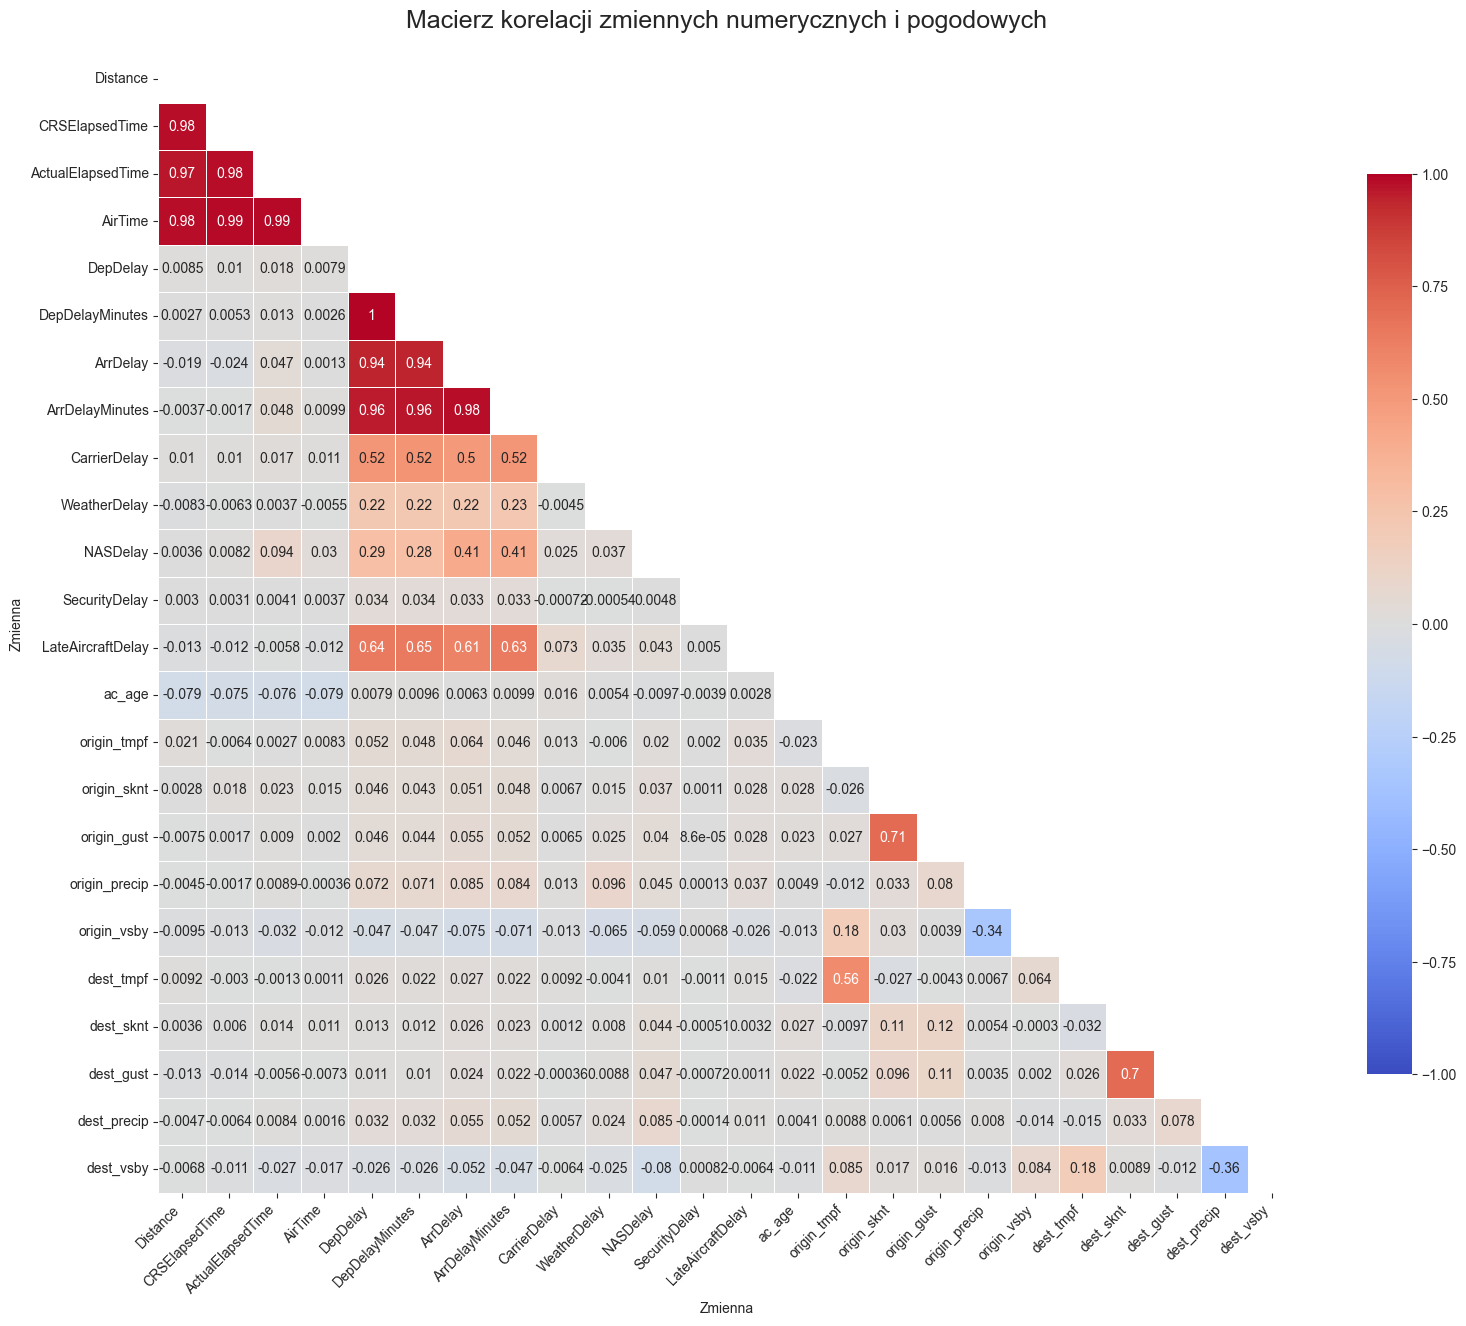

In [148]:
numeric_cols = [
    'Distance', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 
    'DepDelay', 'DepDelayMinutes', 'ArrDelay', 'ArrDelayMinutes',
    'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
    'ac_age', 
    'origin_tmpf', 'origin_sknt', 'origin_gust', 'origin_precip', 'origin_vsby',
    'dest_tmpf', 'dest_sknt', 'dest_gust', 'dest_precip', 'dest_vsby'
]

# Tworzymy kopię potrzebnych danych
df_corr = df[numeric_cols].copy()

# 2. Obliczamy macierz korelacji (domyślnie Pearson)
corr_matrix = df_corr.corr()

# 3. Tworzymy maskę na górny trójkąt macierzy
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 4. Konfiguracja i rysowanie wykresu
plt.figure(figsize=(16, 14)) # Dość duży rozmiar ze względu na liczbę zmiennych

# Rysowanie heatmapy za pomocą Seaborn
sns.heatmap(
    corr_matrix, 
    mask=mask, 
    cmap='coolwarm', # Niebieski dla ujemnych, czerwony dla dodatnich
    vmax=1.0, 
    vmin=-1.0, 
    center=0, 
    square=True, 
    linewidths=.5, 
    cbar_kws={"shrink": .7}, # Zmniejszenie paska skali
    annot=True # Przy tylu zmiennych liczby zaleją ekran, wyłączamy je
)

plt.title('Macierz korelacji zmiennych numerycznych i pogodowych', fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Zapis do pliku (zgodnie z instrukcjami w tym środowisku, bez plt.show())
# plt.savefig('macierz_korelacji.png', dpi=300)
# plt.close()

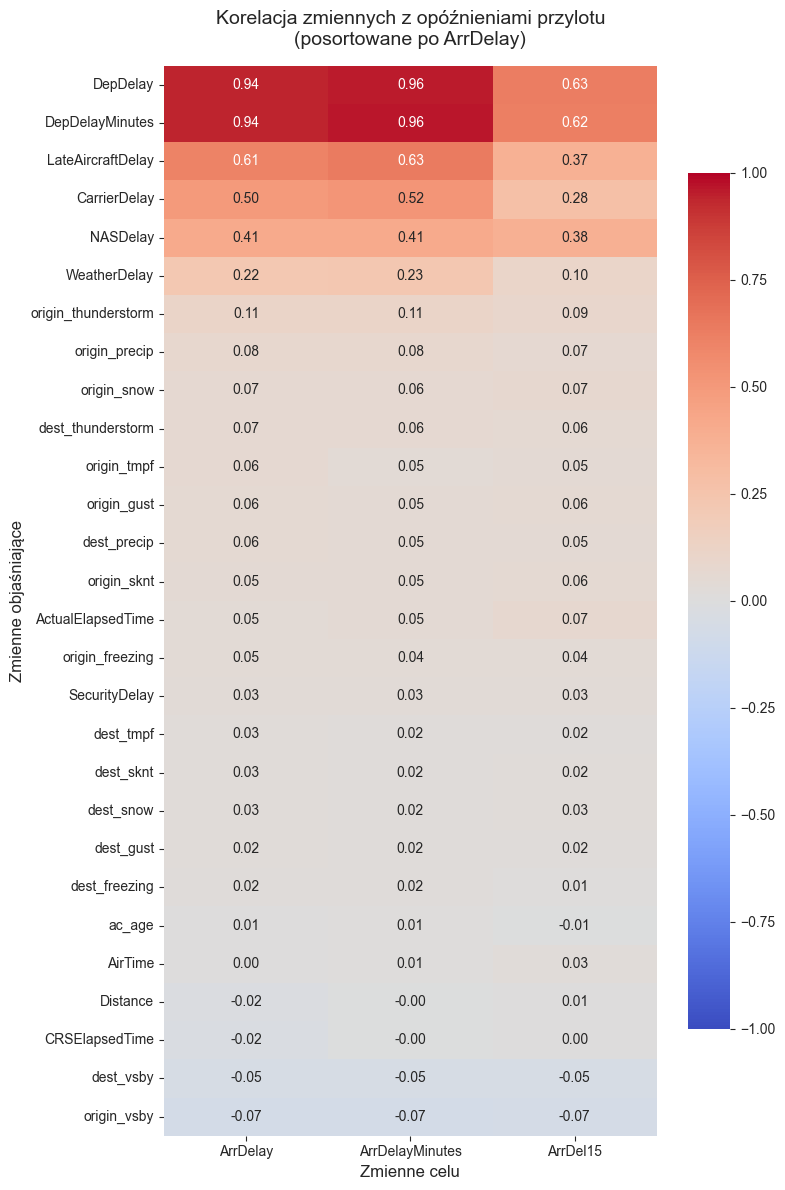

In [149]:
targets = ['ArrDelay', 'ArrDelayMinutes', 'ArrDel15']

features = [
    'Distance', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 
    'DepDelay', 'DepDelayMinutes', 
    'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
    'ac_age', 
    'origin_tmpf', 'origin_sknt', 'origin_gust', 'origin_precip', 'origin_vsby',
    'origin_thunderstorm', 'origin_snow', 'origin_freezing',
    'dest_tmpf', 'dest_sknt', 'dest_gust', 'dest_precip', 'dest_vsby',
    'dest_thunderstorm', 'dest_snow', 'dest_freezing'
]

# 2. Tworzymy kopię tylko niezbędnych kolumn
cols_to_keep = targets + features
df_corr_subset = df[cols_to_keep].copy()

# 3. Konwersja typów: pandasowe typy boolean i Int na float32 dla bezpiecznej korelacji
for col in df_corr_subset.columns:
    if str(df_corr_subset[col].dtype) in ['boolean', 'Int8', 'Int16', 'Int32']:
        df_corr_subset[col] = df_corr_subset[col].astype('float32')

# 4. Obliczamy pełną macierz, ale wycinamy tylko to, co nas interesuje
full_corr = df_corr_subset.corr()
target_corr = full_corr.loc[features, targets]

# 5. Sortujemy wyniki po korelacji z główną zmienną 'ArrDelay', aby wykres był czytelny
target_corr_sorted = target_corr.sort_values(by='ArrDelay', ascending=False)

# 6. Wizualizacja
plt.figure(figsize=(8, 12)) # Wąski, ale wysoki wykres

sns.heatmap(
    target_corr_sorted, 
    annot=True,       # Wyświetlamy wartości liczbowe
    fmt=".2f",        # Zaokrąglenie do 2 miejsc po przecinku
    cmap="coolwarm",  # Niebieski (ujemne), biały (brak), czerwony (dodatnie)
    vmin=-1, 
    vmax=1, 
    cbar_kws={"shrink": .8}
)

plt.title('Korelacja zmiennych z opóźnieniami przylotu\n(posortowane po ArrDelay)', fontsize=14, pad=15)
plt.ylabel('Zmienne objaśniające', fontsize=12)
plt.xlabel('Zmienne celu', fontsize=12)
plt.tight_layout()

# Zapis wykresu
# plt.savefig('korelacja_opoznienia_cel.png', dpi=300)
# plt.close()

C:\Users\jakub\AppData\Local\Temp\ipykernel_19756\3958448720.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\jakub\AppData\Local\Temp\ipykernel_19756\3958448720.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


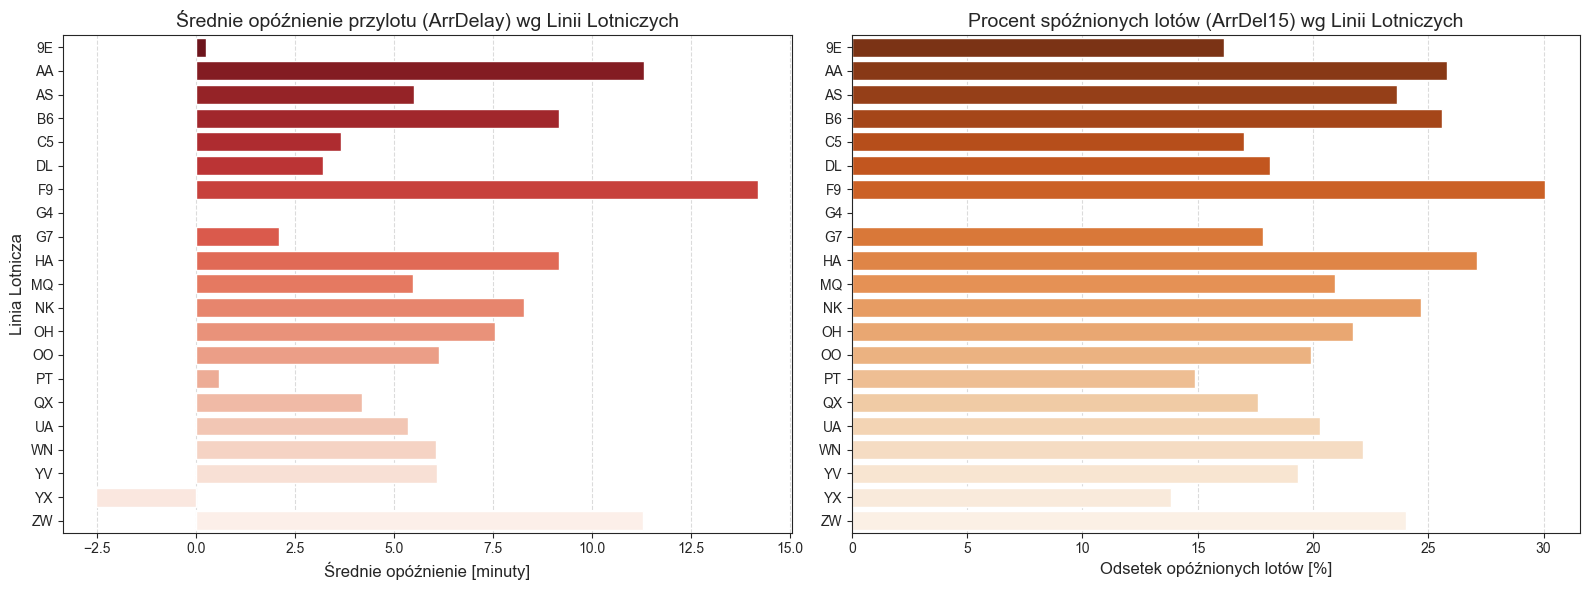

In [150]:
cols_to_keep = ['Operating_Airline', 'ArrDelay', 'ArrDel15']
df_cat = df[cols_to_keep].copy()

# 2. Czyszczenie danych - usuwamy wiersze, gdzie brakuje danych o opóźnieniach (np. odwołane loty)
df_cat = df_cat.dropna(subset=['ArrDelay', 'ArrDel15'])

# 3. Zmieniamy typ ArrDel15 na numeryczny (0 i 1), aby łatwo policzyć procent (średnią)
df_cat['ArrDel15'] = df_cat['ArrDel15'].astype('float32')

# 4. Agregacja danych - grupujemy po linii lotniczej i liczymy średnie
grouped_data = df_cat.groupby('Operating_Airline').agg(
    Avg_ArrDelay=('ArrDelay', 'mean'),
    Delay_Rate=('ArrDel15', 'mean') # Średnia z 0 i 1 da nam odsetek opóźnionych lotów
).reset_index()

# 5. Zamieniamy odsetek na procenty dla lepszej czytelności (np. 0.15 -> 15.0)
grouped_data['Delay_Rate'] *= 100

# 6. Sortujemy dane po średnim opóźnieniu (od najgorszych do najlepszych)
grouped_data = grouped_data.sort_values(by='Avg_ArrDelay', ascending=False)

# 7. Wizualizacja (dwa wykresy obok siebie)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Wykres 1: Średnie opóźnienie w minutach
sns.barplot(
    data=grouped_data, 
    x='Avg_ArrDelay', 
    y='Operating_Airline', 
    ax=axes[0], 
    palette='Reds_r'
)
axes[0].set_title('Średnie opóźnienie przylotu (ArrDelay) wg Linii Lotniczych', fontsize=14)
axes[0].set_xlabel('Średnie opóźnienie [minuty]', fontsize=12)
axes[0].set_ylabel('Linia Lotnicza', fontsize=12)
axes[0].grid(axis='x', linestyle='--', alpha=0.7)

# Wykres 2: Procent lotów spóźnionych o >= 15 min
sns.barplot(
    data=grouped_data, 
    x='Delay_Rate', 
    y='Operating_Airline', 
    ax=axes[1], 
    palette='Oranges_r'
)
axes[1].set_title('Procent spóźnionych lotów (ArrDel15) wg Linii Lotniczych', fontsize=14)
axes[1].set_xlabel('Odsetek opóźnionych lotów [%]', fontsize=12)
axes[1].set_ylabel('') # Ukrywamy etykietę osi Y, bo linie są te same co po lewej
axes[1].grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
# plt.savefig('kategorie_linie_lotnicze.png', dpi=300)
# plt.close()

C:\Users\jakub\AppData\Local\Temp\ipykernel_19756\2762952965.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


                    Zmienna  R2_percent
0         Operating_Airline       0.680
3  DOT_ID_Operating_Airline       0.680
6                     model       0.641
1                    Origin       0.543
7                  typecode       0.353
2                      Dest       0.263
5          manufacturername       0.223
4         icaoaircraftclass       0.008


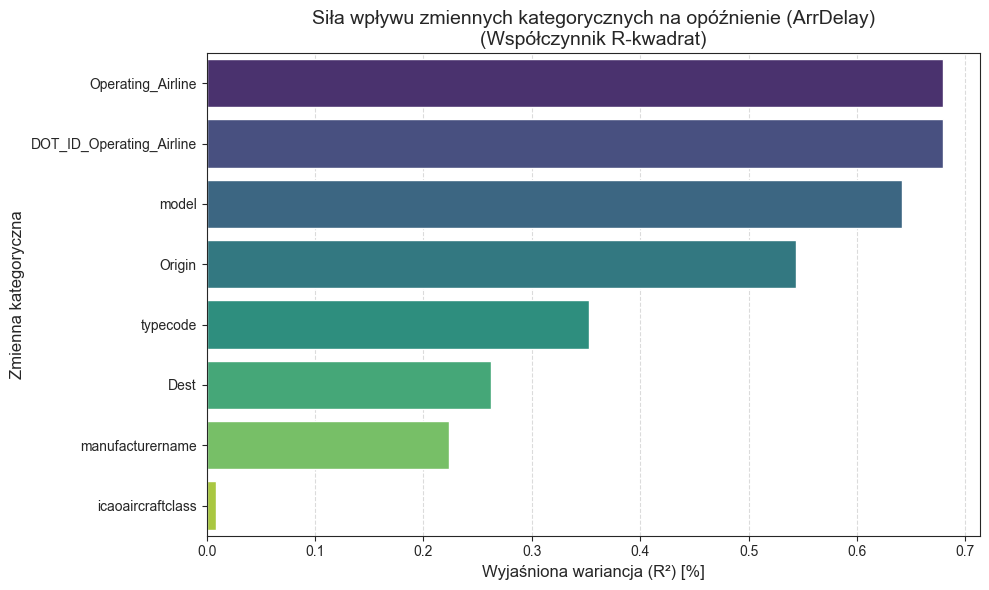

In [151]:
target = 'ArrDelay'
cat_features = [
    'Operating_Airline', 'Origin', 'Dest', 'DOT_ID_Operating_Airline',
    'icaoaircraftclass', 'manufacturername', 'model', 'typecode'
]

# 2. Tworzymy kopię i usuwamy braki danych dla zmiennej celu
df_r2 = df[[target] + cat_features].dropna(subset=[target]).copy()

# 3. Obliczamy statystyki globalne dla SS_total
global_mean = df_r2[target].mean()
ss_total = ((df_r2[target] - global_mean) ** 2).sum()

r2_results = {}

# 4. Pętla obliczająca R^2 dla każdej zmiennej kategorycznej
for col in cat_features:
    # Pomijamy wiersze z brakami w badanej kategorii
    df_valid = df_r2.dropna(subset=[col])
    
    # Grupowanie i agregacja
    grouped = df_valid.groupby(col, observed=True).agg(
        group_size=(target, 'count'),
        group_mean=(target, 'mean')
    )
    
    # Obliczenie SS_between
    ss_between = (grouped['group_size'] * ((grouped['group_mean'] - global_mean) ** 2)).sum()
    
    # Zabezpieczenie przed dzieleniem przez zero, jeśli ss_total = 0
    r2 = ss_between / ss_total if ss_total > 0 else 0
    r2_results[col] = r2

# 5. Tworzenie DataFrame z wynikami i sortowanie
r2_df = pd.DataFrame(list(r2_results.items()), columns=['Zmienna', 'R2'])
r2_df = r2_df.sort_values(by='R2', ascending=False)
# Zamiana R2 na procenty dla czytelności
r2_df['R2_percent'] = r2_df['R2'] * 100 

# 6. Wizualizacja
plt.figure(figsize=(10, 6))
sns.barplot(
    data=r2_df, 
    x='R2_percent', 
    y='Zmienna', 
    palette='viridis'
)

plt.title('Siła wpływu zmiennych kategorycznych na opóźnienie (ArrDelay)\n(Współczynnik R-kwadrat)', fontsize=14)
plt.xlabel('Wyjaśniona wariancja (R²) [%]', fontsize=12)
plt.ylabel('Zmienna kategoryczna', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Zapis do pliku
# plt.savefig('wspolczynnik_R2_kategorie.png', dpi=300)
# plt.close()

# Opcjonalnie wyświetlenie tabelki w konsoli
print(r2_df[['Zmienna', 'R2_percent']].round(3))